# Machine Learning Engineering - Final Assignment

#### Name and source statement
Enter your names (in the requested format, please) and your github handle. You can do this assignment alone or in a team of 2. If you are in a team of two, enter both your names below, but submit using a single github account. Note that students who do the assignment individually are entitled to a bonus point for the extra work.

As usual, add a statement on your sources. You are allowed to look up things and use AI tools, but you need to honestly state what you used and how, e.g. to debug code and resolve errors, conceptual understanding, code cleanup or optimization, or generate (partial) solutions. This is required, don't forget.

In [1]:
!pip install openml pandas numpy matplotlib torch pytorch-lightning torchvision openml-pytorch scikit-learn Pillow

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [31]:
# Fill in your name using the given format, GitHub handle, and sources
your_name = "LLODIO, ARANTZA"
second_name = "LAST_NAME, FIRST_NAME" # only if you are working in a pair
github_handle = ""
statement = """
            Describe which sources and AI tools you used and how.
            """

# Topic: Experiments in Transfer Learning

In this assignment, you will explore multiple more advanced computer vision tasks on a rich collection of real-world datasets, covering domains ranging from fauna and flora to textures and human activities. We will explore convolutional model design, transfer learning, fine-tuning, few-shot learning, embedding analysis, and we'll do a classroom challenge as well.

### Practical guidance
This is a much more open assignment than the previous homeworks, and there won't be automated feedback. We highly recommend starting soon and using the labs to get feedback from the TAs and fellow students. You can work in teams of 2 students, although you can also do it individually. If you work as a team:
* Note that the questions build on each other so they can't be easily split between two people. We highly recommend to solve the questions as a team, e.g. by exploring multiple options in parallel and giving feedback to each other. 
* Only one person in the team needs to make a submission to GitHub.

### Deliverables
The solution will consist of the following deliverables:
* A report in PDF format of no more than 5 pages (roughly one page per question) in which you clearly explain what you tried and the design decisions that you made to arrive at your final model. You can include text, tables, and figures. If you include tables figures of your results, the data for this should be present in your notebook. You can't show results that are not clearly derived from your code. You can add supporting material such as screenshots from TensorBoard or W&B to motivate your decisions. This report will be graded.
* This notebook with all your code and the results that you obtained. This notebook must contain all the relevant outputs and all requested outputs such as trained models must be included in you GitHub repo and submitted to GitHub classroom.
 
### Special variables
Use the path `base_dir='...'` to refer to the folder where you want to store your files while making the assignment. Before submitting, make sure that all your stored models and learning curves are in your GitHub repo root directory and set `base_dir='.\'`

Use variable `skip_training = True` to skip the training of your models when re-running your notebook. We provide some code that you can use to either train and store your models, or load them from file.

_Sidenote_: if you use Colab, you can link to a Google Drive and store your models there.
* In Colab, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
* Create a folder in your Drive to store assignment files and set `base_dir` to that directory
  * E.g. it could be `base_dir = '/content/drive/MyDrive/assignment'` 

### Using GPUs
Using a GPU will speed up training a lot. You have a number of options (and also combine them):
* If you have a local GPU, you can use that for most model exploration. If you have a Windows system [see here for tips on installing CUDA](https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/), if you haven't already.
* You can use Google Colab. In Runtime > Change runtime type, select a GPU under Hardware Accelerator. T4 is ok for initial experiments, A100 only makes sense for larger models. Note that credits on Colab are limited, especially on a free plan.
* Use the HPC resources on the Snellius supercomputer. We did a tutorial during the labs. You can also [find the slides on Canvas](https://canvas.tue.nl/courses/28782/files).

Take this into account in your planning, so that you don't do all your training at the last moment and are locked out right or waiting in queues before the deadline. You can do initial experiments locally (or on Colab if you don't have a GPU), then use the supercomputer only for large-scale experiments.

### Execution and submission
You do not have to run everything inside this notebook. You can copy code into scripts and run them independently. What is important is that all your final code is copied faithfully inside this notebook and that all trained models are submitted with it. In case of doubt we will rerun your code to check whether your results can be reproduced. No matter where you train your models, make sure you that you copy all stored models and other files to the root directory of your GitHub repo, submit them to GitHub before the deadline, and set `base_dir='.\'`. A unit test will try to run your notebook top to bottom and this must be done within 1 hour. Store the results of long-running processes to disk. Again, don't wait until the last moment to submit.

### Constraints
* Except for the last question, your models cannot be larger than 100MB when stored on disk. GitHub will not allow uploading if they are. Take this into account especially for loading pre-trained models. Bigger pre-trained models are not always better - in fact they will easily overfit. Make sure that your model weights take less than 100MB of storage. We'll provide some helper code to store models efficiently (e.g. at half precision).
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts. Don't trust AI tools to quickly solve the questions for you at the last minute.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to check that all the results are included.
* The dataset we will use is quite large and can take a while to download and cache for the first time. Once cached, it should load fast. Even if you use Colab, at least run the notebook once locally when you start doing the assignment (i.e., now).
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model. Don't say 'I tried every possible option and this is the best I found', but rather 'I tried X because I think that Y' and then interpret the results and what you learned from them'.
* **Be original. We will check for plagiarism between student submissions.**

##### **Tips on using AI tools**
From experiences over the last years in this and other courses, we learned that the quality of assignment solutions has (somewhat surprisingly) gone down with the arrival of AI tools. This is in part because chatbots may not fully understand the question and thus make mistakes, but primarily because AI tools cause students to interact less with each other, and more often postpone work too long. Recommendations:
* Using AI can help you do better ML engineering, but requires solid ML knowledge and programming skills to begin with to critically assess the responses. Make sure you understand the concepts taught in the course and do the labs first.
* Talk to fellow students (and the teaching team). Don't copy code but do ask questions and learn from each other. Share the enthousiasm of learning and solving problems.
* Always try to solve the assignment by yourself so that you really understand the question and the challenges. Using AI to understand and resolve errors, or to explain vague concepts is fine.


In [2]:
# For use in colab
if 'google.colab' in str(get_ipython()):
  !pip instal l -U --quiet openml git+https://github.com/openml/openml-pytorch

In [1]:
# Pre-flight checklist. Do not change this code.
# Make sure that you have installed recent versions of key packages.
%matplotlib inline
import openml
import os
import json
import random
import math
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
import pytorch_lightning as pl
import torchvision.models as models
import torchvision.transforms as transforms
import openml_pytorch as opt

from torch import nn
from torch.utils.data import Dataset, DataLoader
from collections import defaultdict
from pathlib import Path
from packaging import version
from sklearn.model_selection import train_test_split
from IPython.display import Markdown, display
from PIL import Image

warnings.simplefilter(action='ignore', category=FutureWarning)

torch_version = torch.__version__
if version.parse(torch_version) < version.parse("2.6.0"):
    print("torch is outdated: {}. Please update now! pip install -U torch".format(torch_version))
else:
    print("OK. You may continue :)")

OK. You may continue :)


In [2]:
# Directory where you store all model files, training histories, etc.
# Set this back to 'base_dir = "./"' before submitting your assignment to GitHub
base_dir = "./"

# Flag for whether to train the models or simply retrieve them
# Set to True before submitting your assignment to GitHub
skip_training = False

# Optional: you can tell OpenML to store the dataset in a particular folder
# This can help to avoid downloading the dataset multiple times
# openml.config.cache_directory = f"{base_dir}/cache"

### Evaluation harness
This class is to mean to log metrics (loss and accuracy) and aurtomatically save models and metrics to file in a systematic way.
Don't modify this class unless you have a sound reason to do so.

In [17]:
class ModelLogger(pl.Callback):
    """ Helper class to log metrics and save models in a systematic way.
        Don't modify this class unless you have a sound reason to do so.
        
    Attributes:
        output_dir (str) : Directory to save model and metrics (base_dir by default)
        model_name (str) : Name of the model. Should be model_1 for your final model in Question 1.
        use_half (bool)  : Whether to save model in half precision. This reduces file size but is 
                           less accurate and not ideal for continued training.
    """
    def __init__(self, model_name="model", test_loader=None, output_dir=base_dir, use_half=False):
        super().__init__()
        self.output_dir = output_dir
        self.model_name = model_name
        self.test_loader = test_loader
        self.use_half = use_half
        self.history = {
            "train_loss": [],
            "val_loss": [],
            "train_acc": [],
            "val_acc": []
        }
        self.current_val_loss = 0.0
        self.current_val_acc = 0.0
        os.makedirs(output_dir, exist_ok=True)

    # Logs the loss and accuracy for each epoch
    def log_epoch(self, train_loss, val_loss, train_acc=None, val_acc=None):
        self.history["train_loss"].append(train_loss)
        self.history["val_loss"].append(val_loss)
        self.history["train_acc"].append(train_acc if train_acc is not None else 0.0)
        self.history["val_acc"].append(val_acc if val_acc is not None else 0.0)

    # Saves the model weights to a file
    def save_model(self, model):
        path = os.path.join(self.output_dir, f"{self.model_name}.pt")
        state_dict = model.state_dict()

        if self.use_half:
            state_dict = {k: v.half() if v.dtype == torch.float32 else v for k, v in state_dict.items()}
        torch.save(state_dict, path)

    # Loads the stored weights into the given model
    def load_model(self, model):
        path = os.path.join(self.output_dir, f"{self.model_name}.pt")
        state_dict = torch.load(path)
        model.load_state_dict(state_dict)
        return model

    # Saves the metrics (learning curve) to a file
    def save_metrics(self):
        path = os.path.join(self.output_dir, f"{self.model_name}_metrics.json")
        with open(path, "w") as f:
            json.dump(self.history, f, indent=2)

    # Loads the metrics (learning curve) from a file
    def load_metrics(self):
        path = os.path.join(self.output_dir, f"{self.model_name}_metrics.json")
        with open(path, "r") as f:
            self.history = json.load(f)

    # Plots the learning curves based on the stored metrics
    def plot_learning_curves(self):
        epochs = range(1, len(self.history["train_loss"]) + 1)
        plt.figure(figsize=(8, 4))

        # Loss plot
        plt.subplot(1, 2, 1)
        plt.plot(epochs, self.history["train_loss"], label='Train Loss')
        plt.plot(epochs, self.history["val_loss"], label='Val Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss Curve')
        plt.legend()

        # Accuracy plot
        plt.subplot(1, 2, 2)
        plt.plot(epochs, self.history["train_acc"], label='Train Accuracy')
        plt.plot(epochs, self.history["val_acc"], label='Val Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Accuracy Curve')
        plt.legend()

        plt.tight_layout()
        filename = os.path.join(self.output_dir, f"{self.model_name}_learning_curves.png")
        plt.savefig(filename)
        plt.show()

    # Returns the best (smoothed) validation accuracy and the epoch at which it was recorded
    def get_best_validation_accuracy(logger, window_size=3):
        val_accuracies = logger.history["val_acc"]
        
        if len(val_accuracies) < window_size:
            # Not enough data points, return the max
            return max(val_accuracies), val_accuracies.index(max(val_accuracies))
        
        # Calculate moving average
        moving_averages = []
        for i in range(len(val_accuracies) - window_size + 1):
            window = val_accuracies[i:i + window_size]
            moving_averages.append(sum(window) / window_size)
        
        # Find best moving average
        best_avg = max(moving_averages)
        best_window_end = moving_averages.index(best_avg) + window_size - 1
        
        print(f"Best validation accuracy: {best_avg:.4f} at epoch {best_window_end} (smoothed over {window_size} epochs)")

    @torch.no_grad()
    def evaluate_on_testset(self, model):
        try:
            model.eval() # Put model in eval mode

            total_correct, total_samples = 0, 0
            for batch in self.test_loader:
                x, y = batch
                x, y = x.to(device), y.to(device)  # Move data to same device as model
                logits = model(x)
                preds = logits.argmax(dim=1)
                total_correct += (preds == y).sum().item()
                total_samples += y.size(0)

            accuracy = total_correct / total_samples
            self.history["test_acc"] = accuracy
            print(f"Test Accuracy: {accuracy:.4f}")
        except RuntimeError as e:
            print("Could not evaluate on test set. Is the model architecture correct?")

    # At the end of a training run, this stores the model weights and metrics and returns a metric plot
    def finalize(self, model):
        self.save_metrics()
        self.save_model(model)
        self.plot_learning_curves()
        self.get_best_validation_accuracy()
        self.evaluate_on_testset(model)

    # Reports on the metric of a trained model
    def report(self, model):
        self.load_metrics()
        self.plot_learning_curves()
        self.get_best_validation_accuracy()
        self.evaluate_on_testset(model)

    # --- PyTorch Lightning integration ---

    # Callback function to store the training loss and accuracy at the end of each epoch
    def on_train_epoch_end(self, trainer, pl_module):
        if trainer.sanity_checking:
            return # Don't log anything during a sanity check
        
        # Store the train metrics at the end of training epoch
        train_loss = float(trainer.callback_metrics.get("train_loss", 0.0))
        train_acc = float(trainer.callback_metrics.get("train_acc", 0.0))
        # Save these for later use when validation completes
        self.current_train_loss = train_loss
        self.current_train_acc = train_acc

        # Use the stored training metrics
        # on_validation_epoch_end runs first, so we can use the stored values here
        self.log_epoch(train_loss, self.current_val_loss, train_acc, self.current_val_acc)
    
    # Callback function to store the validation loss and accuracy at the end of each epoch
    def on_validation_epoch_end(self, trainer, pl_module):
        if trainer.sanity_checking:
            return # Don't log anything during a sanity check
        
        # Get validation metrics from trainer's callback_metrics
        val_loss = float(trainer.callback_metrics.get("val_loss", 0.0))
        val_acc = float(trainer.callback_metrics.get("val_acc", 0.0))

        self.current_val_loss = val_loss
        self.current_val_acc = val_acc
        
    # Callback to store the model and metrics at the end of training
    def on_train_end(self, trainer, pl_module):
        self.finalize(pl_module)

# Example data loader. Feel free to write your own
class ImageDataset(Dataset):
    """ Helper class for loading images into a Torch dataset. """
    def __init__(self, X, y, transform=None):
        self.file_paths = X["file_path"].values
        self.labels = y.values
        self.transform = transform or transforms.ToTensor()
        
        # Few few-shot learning only
        self.class_to_indices = defaultdict(list)
        for idx, label in enumerate(self.labels):
            self.class_to_indices[label].append(idx)
        self.classes = list(self.class_to_indices.keys())

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img_path = self.file_paths[idx]
        label = self.labels[idx]

        # Load image
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label).long()
    
    # Utility function to get all images for a given class
    # Useful for few shot learning
    def get_images_for_class(self, class_label):
        return self.class_to_indices[class_label]

    
# Helper functions for illustration
def dummy_train(epoch):
    dummy_loss = 1.0 / (epoch + 1)
    dummy_acc = 0.5 + 0.4 * (1 - math.exp(-0.5 * epoch))
    return dummy_loss, dummy_acc
def dummy_val(epoch):
    dummy_loss = 1.2 / (epoch + 1)
    dummy_acc = 0.4 + 0.4 * (1 - math.exp(-0.5 * epoch))
    return dummy_loss, dummy_acc

In [18]:
# For evaluation of few shot learning in part 3
# Create subsets of examples for specific subsets of classes
class SubsetByClass(torch.utils.data.Dataset):
    def __init__(self, base_dataset, allowed_classes):
        self.base_dataset = base_dataset
        self.allowed_classes = set(allowed_classes)
        self.class_to_idx = {cls: i for i, cls in enumerate(allowed_classes)}

        # Filter indices that belong to allowed classes
        self.filtered_indices = [
            idx for idx in range(len(base_dataset))
            if int(base_dataset[idx][1]) in self.allowed_classes
        ]

        self.class_indices = dict()
        for i, idx in enumerate(self.filtered_indices):
            cls = int(base_dataset[idx][1])
            if cls not in self.class_indices:
                self.class_indices[cls] = set()
            self.class_indices[cls].add(i)

    def __len__(self):
        return len(self.filtered_indices)

    def __getitem__(self, i):
        real_idx = self.filtered_indices[i]
        img, label = self.base_dataset[real_idx]
        label = int(label)  # Convert from tensor to int
        mapped_label = self.class_to_idx[label]
        return img, mapped_label

    def get_images_for_class(self, cls):
        return sorted(self.class_indices.get(cls, set()))
        # return [
        #     i for i, idx in enumerate(self.filtered_indices)
        #     if int(self.base_dataset[idx][1]) == cls
        # ]

    @property
    def classes(self):
        return list(self.allowed_classes)

# An episodic data loader that yields multiple episodes per batch.
class EpisodicSampler:
    def __init__(self, dataset, episodes_per_epoch, N_way, K_shot, Q_query):
        self.dataset = dataset
        self.episodes_per_epoch = episodes_per_epoch
        self.N_way = N_way
        self.K_shot = K_shot
        self.Q_query = Q_query

    def __iter__(self):
        for _ in range(self.episodes_per_epoch):
            yield self.sample_episode(self.dataset, self.N_way, self.K_shot, self.Q_query)

    def __len__(self):
        return self.episodes_per_epoch
    
    # Creates support and query sets
    def sample_episode(self, dataset, N_way, K_shot, Q_query):
        # Randomly sample N classes
        selected_classes = random.sample(dataset.classes, N_way)

        support_x, support_y = [], []
        query_x, query_y = [], []

        # Get K images of each class for support set and Q images of each class for query set
        for new_label, cls in enumerate(selected_classes):
            indices = dataset.get_images_for_class(cls)
            sampled_indices = random.sample(indices, K_shot + Q_query)

            support_idx = sampled_indices[:K_shot]
            query_idx = sampled_indices[K_shot:]

            for idx in support_idx:
                img, _ = dataset[idx]
                support_x.append(img)
                support_y.append(new_label)

            for idx in query_idx:
                img, _ = dataset[idx]
                query_x.append(img)
                query_y.append(new_label)

        support_x = torch.stack(support_x)
        support_y = torch.tensor(support_y)
        query_x = torch.stack(query_x)
        query_y = torch.tensor(query_y)

        return support_x, support_y, query_x, query_y, selected_classes
    
def visualize_sets(x, y, idx_to_label, selected_classes, title=""):
    fig, axes = plt.subplots(5, 5,  figsize=(10,10), layout='constrained')
    fig.suptitle(title, fontsize=20)
    for i, (xi, yi) in enumerate(zip(x,y)): # index, image, label
        np_img = (xi * 0.5 + 0.5).permute(1, 2, 0).numpy() # Denormalize
        ax = axes[yi][i % 5]
        ax.imshow(np_img)
        ax.set_xlabel(idx_to_label[selected_classes[yi.item()]].split('(')[0][:20], fontsize=15)
        ax.set_xticks([]), ax.set_yticks([])


## Meta-Album 

You will leverage this rich [meta-dataset](https://meta-album.github.io/) to train and evaluate models under various scenarios, using PyTorch (and optionally PyTorch Lightning for easier training management). The tasks include standard classification model development, transfer learning within and across domains, few-shot learning with Prototypical Networks, and analyzing the learned feature representations. You are expected to have prior knowledge of CNN architectures (e.g. ResNets) and experience with training models in PyTorch. Use of pre-trained models and libraries is encouraged to expedite experiments. Complete the following questions (1–5). Each part/question is designed to be feasible in a few hours (if you have done the labs), so do ask questions in case you get stuck or anything is not clear. Note that even though the coding can be done in a few hours, running the experiments can take longer depending on how much you explore. It can be enticing to explore many models to find a slightly better solution, but take care that you don't spend too much time on this either. It's equally important to carefully document your results and observations for each part. Writing is thinking. Good luck!

<img src="https://meta-album.github.io/assets/img/samples/sample.png" width="900">

You can uncomment and run the code below to learn more about the different datasets.

In [5]:
benchmark_suite = openml.study.get_suite('Meta-Album_Extended_2022')
for data_id in benchmark_suite.data:
    d = openml.datasets.get_dataset(data_id)
    #display(Markdown("**[{}](https://openml.org/d/{})**".format(d.name,d.id) + d.description[:400].split("***")[1] + "... "))

## Part 1: Birds (6 points)

Our first challenge is to recognize many different types of wonderful birds. We'll first load the data. The first time you run this, it will take a few minutes to download all images, but after caching it will only take seconds. Next, we can visualize random images (have fun!). Feel free to do more exploratory analysis to better understand the data.

We split the data into a train, validation, and test set. As usual, we'll use the validation set for model selection and hyperparameter tuning, and the test set to evaluate the final model.

In [6]:
# Do not change this code and don't overwrite the data splits created below.
BRD = openml.datasets.get_dataset(46770, download_all_files=True)
data_dir = Path(openml.config.get_cache_directory())/'datasets'/str(BRD.dataset_id)/"BRD_Extended"/"images"
X_all, y_all, categorical_indicator, attribute_names = BRD.get_data(target=BRD.default_target_attribute)
X_all["file_path"] = X_all["FILE_NAME"].apply(lambda x: os.path.join(data_dir, x))
print("The dataset has {} images of birds and {} classes".format(X_all.shape[0], len(np.unique(y_all))))

# Map labels to integers
label_to_idx = {label: idx for idx, label in enumerate(sorted(y_all.unique()))}
idx_to_label = {idx: label for label, idx in label_to_idx.items()}
y_all = y_all.map(label_to_idx)

# Train-test split and data loaders
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42, stratify=y_all)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

The dataset has 49053 images of birds and 315 classes


Here is some helper code to create Torch datasets from this data (with any transformations that we like):

In [7]:
# Transform for training data. Feel free to change (e.g. add data augmentation).
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3),
])

# Transform for test data. Leave this unchanged.
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3),
])

# Dummy data loaders (only 128 data points). Feel free to change.
train_ds = ImageDataset(X_train, y_train, transform=transform)
val_ds = ImageDataset(X_val, y_val, transform=test_transform)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)

# Test data loader. Leave this unchanged.
test_ds = ImageDataset(X_test, y_test, transform=test_transform)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

Let's peek at some random images to see what we are dealing with (have fun exploring!)

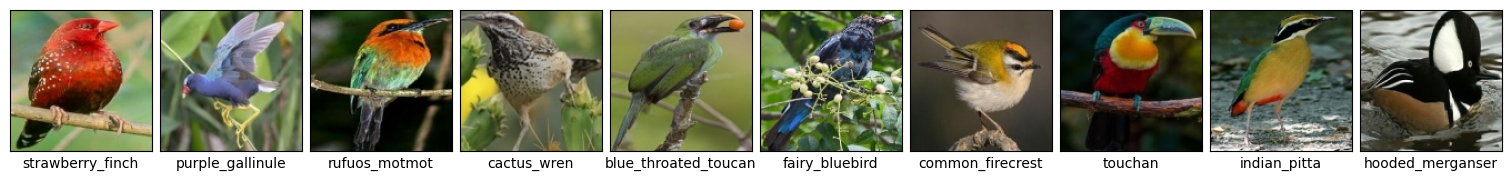

In [8]:
def visualize_random(dataset, idx_to_label):
    fig, axes = plt.subplots(1, 10,  figsize=(15,50), layout='constrained')
    for i, n in enumerate(random.sample(range(0, len(dataset)), 10)):
        image, label = dataset[n]
        np_img = (image * 0.5 + 0.5).permute(1, 2, 0).numpy() # Denormalize for imshow
        axes[i].imshow(np_img)
        axes[i].set_xlabel(idx_to_label[label.item()].split("(")[0][:20], fontsize=10)
        axes[i].set_xticks(()), axes[i].set_yticks(())
        
visualize_random(train_ds, idx_to_label)

Develop an image classifier **from scratch** for this dataset (don't import pretrained weights). You can freely choose a model architecture, apply data augmentation, tune hyperparameters, and evaluate performance:
* **Model Architecture**: Start with a CNN architecture. You could use a standard architecture like a small ResNet (e.g. ResNet-18) or design a custom CNN with a few convolutional layers followed by fully-connected layers. Since you train from scratch, a simpler model might converge more reliably on limited data. Feel free to experiment with adding layers or using regularization to improve learning. Hint: If using a standard architecture, consider modifying the input to what the model expects, and adjust final layers to match the number of classes in your chosen dataset.
* **Data Preparation & Augmentation**: Apply appropriate data augmentations to increase variety (e.g. horizontal flips, rotations, color jitter). Augmentation can improve generalization, especially for limited data, by simulating realistic variations in the images. Use torchvision.transforms to compose augmentations. Ensure you also normalize the images to get better convergence.
* **Optimization**: Train the model using an appropriate loss (cross-entropy for classification) and optimizer. Split the training data into training and validation data and monitor training and validation accuracy. Adjust the model architectire and hyperparameters like learning rate, batch size, and number of epochs. You may use a learning rate scheduler if training for many epochs. Aim to achieve a strong accuracy on the validation set.
* **Evaluation**: After training, evaluate the model on the test set.  We provide a simple evaluation harness that will help you track, evaluate, and store the model. See below for example usage. Call your best model `model_1` (as illustrated below).

**Grading**  
You can gain up to 3 points if your code is correct and you give a clear and detailed explanation of your design process and design decisions. What did you try and why did you think that would work? Did you make specific decisions based on your knowledge, based on properties of the dataset in question, based on repeated experiments, or other factors? How did you tune hyperparameters? What did actually work well and what worked less well than expected? Can you explain why things worked (or not) in hindsight? What did you struggle with and what did you learn? Try to be detailed but stay to the point, remain professional, and try to remain within 1 page (less is also ok).

The other 3 points depend on how good your model is (accuracy), evaluated on the test set, and graded linearly where 7/10 (1.5/3) is given for the average accuracy of all models in class, and 10/10 (3/3) to the best score in class. 75% accuracy is certainly attainable. Only correct solutions count for this. If your code contains errors, some points may be deducted for that. E.g. using a pretrained model would make your solution invalid for this question.

**Important**
* Document any architecture design, tuning or augmentation tricks that improved performance. Ensure that you save the trained model (weights) for later use (we’ll be reusing this in Transfer Learning). Use the provided code for this.
* Provide the training code inside this notebook, including model definition and training loops. Show augmentation code and report the final performance. Discuss what you tried to improve the model (e.g. “adding random rotations improved accuracy by 2% by making the model invariant to orientation”).

**Tip**: See the [Deep learning tuning playbook](https://github.com/google-research/tuning_playbook?tab=readme-ov-file#choosing-the-model-architecture) for tips, tricks and FAQs about optimizing deep learning architectures.

Example usage with standard Torch. You can freely decide how to organize your code, but use the logger as indicated so that we (and you) can systematically evaluate your model. You can also write your own evaluation code if you find this too limiting, but make sure that it is correct.

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

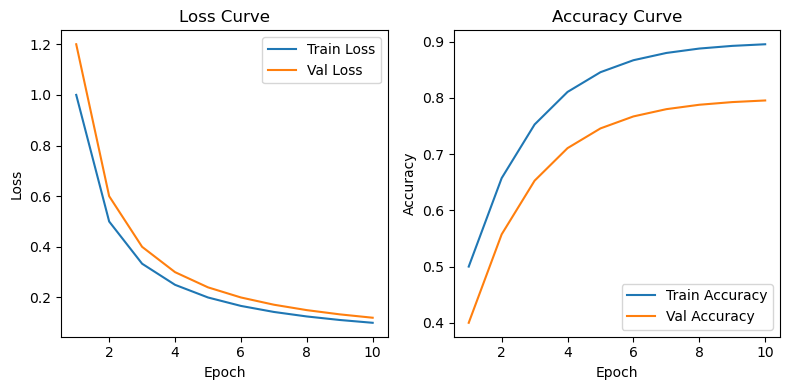

Best validation accuracy: 0.7921 at epoch 9 (smoothed over 3 epochs)
Could not evaluate on test set. Is the model architecture correct?


In [11]:
# Create logger with model name
logger = ModelLogger("model_0", test_loader)

# Create your model
model = nn.Linear(in_features=10, out_features=1) # You can do better :)
model.to(device)

# Define how you train your model
def train_model_1(model, logger, epochs=10):
    for epoch in range(10):
        # Do training and validation steps
        train_loss, train_acc = dummy_train(epoch) # Replace
        val_loss, val_acc = dummy_val(epoch) # Replace
        
        # Log
        logger.log_epoch(train_loss, val_loss, train_acc, val_acc)
        
    # Save
    logger.finalize(model)


# This will load your data from file rather than training it. 
# Make sure to set skip_training to True before submitting.
if skip_training:
    model = logger.load_model(model)
    logger.report(model)
else:
    train_model_1(model, logger)

Example usage with Pytorch Lightning. Again, feel free to organize it differently. Use the logger if you can.

You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type   | Params | Mode 
-----------------------------------------
0 | model | Linear | 11     | train
-----------------------------------------
11        Trainable params
0         Non-trainable params
11        Total params
0.000     Total estimated model params size (MB)
1         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


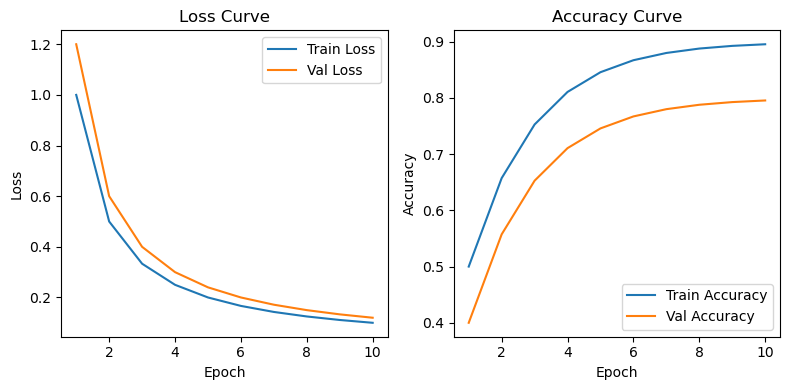

Best validation accuracy: 0.7921 at epoch 9 (smoothed over 3 epochs)
Could not evaluate on test set. Is the model architecture correct?


In [22]:
# Your model. 
class DummyModel(pl.LightningModule):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Linear(input_dim, 1) # You can do better :)

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        # Calculate your actual loss        
        train_loss, train_acc = dummy_train(self.trainer.current_epoch) # Replace
        loss = torch.tensor(train_loss, requires_grad=True)

        # Log metrics
        self.log("train_loss", train_loss, prog_bar=True, on_epoch=True)
        self.log("train_acc", train_acc, prog_bar=True, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        # Calculate your actual validation loss
        val_loss, val_acc = dummy_val(self.trainer.current_epoch) # Replace
        loss = torch.tensor(val_loss, requires_grad=True)
        
        # Log val metrics
        self.log("val_loss", val_loss, prog_bar=True, on_epoch=True)
        self.log("val_acc", val_acc, prog_bar=True, on_epoch=True) 
        return loss

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=0.001) # 0.1

# Create logger with model name
logger = ModelLogger("model_0", test_loader)

# Create your model
model = DummyModel(input_dim=10)

# Define how you train your model
def train_model_1(model, logger, epochs=10):
    trainer = pl.Trainer(max_epochs=epochs, callbacks=[logger], accelerator="auto")
    trainer.fit(model, train_loader, val_loader) # or use a DataModule

# This will load your data from file rather than training it. 
# Make sure to set skip_training to True before submitting.
if skip_training:
    model = logger.load_model(model)
    logger.report(model)
else:
    train_model_1(model, logger)

In [37]:
from pytorch_lightning.callbacks import EarlyStopping

def train_model_RN(model, logger, epochs=10):
    early_stopping = EarlyStopping(monitor="val_loss", patience=3, mode="min")
    trainer = pl.Trainer(max_epochs=epochs, callbacks=[logger, early_stopping], accelerator="gpu")
    trainer.fit(model, train_loader, val_loader) # or use a DataModule

You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/scur0852/.local/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /gpfs/home1/scur0852/lightning_logs/version_10890268/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | conv1     | Sequential       | 1.9 K  | train
1 | layer1    | Sequential       | 147 K  | train
2 | layer2    | Sequential       | 525 K  | train
3 | layer3    | Sequential       | 2.1 M  | train
4 | layer4    | Sequential       | 8.4 M  | train
5 | fc        | Linear           | 161 K  | train
6 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

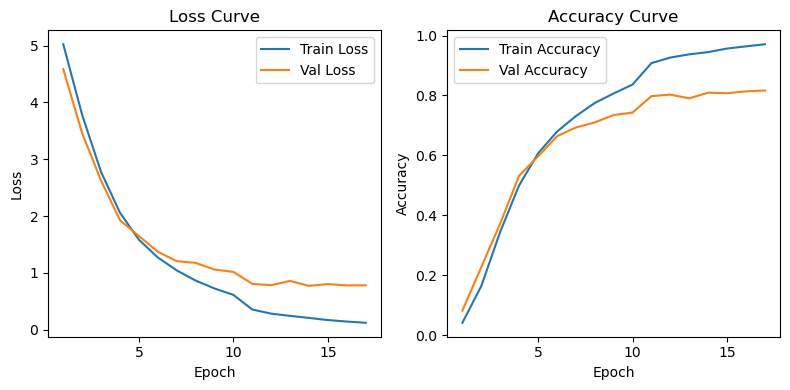

Best validation accuracy: 0.8127 at epoch 16 (smoothed over 3 epochs)
Test Accuracy: 0.8085


In [14]:
class ResidualBlock(pl.LightningModule):
    def __init__(self, input_dimension, output_dimension, stride=1):
        super(ResidualBlock, self).__init__()
        self.left = nn.Sequential(
            nn.Conv2d(input_dimension, output_dimension, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(output_dimension),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Conv2d(output_dimension, output_dimension, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(output_dimension)
        )
        self.shortcut = nn.Sequential()
        if stride != 1 or input_dimension != output_dimension:
            self.shortcut = nn.Sequential(
                nn.Conv2d(input_dimension, output_dimension, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(output_dimension)
            )

    def forward(self, x):
        out = self.left(x)
        out = out + self.shortcut(x)
        out = F.relu(out)
        return out


class ResNetLightning(pl.LightningModule):
    def __init__(self, num_classes=315):  
        super(ResNetLightning, self).__init__()
        self.inchannel = 64
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.layer1 = self.make_layer(ResidualBlock, 64, 2, stride=1)
        self.layer2 = self.make_layer(ResidualBlock, 128, 2, stride=2)
        self.layer3 = self.make_layer(ResidualBlock, 256, 2, stride=2)
        self.layer4 = self.make_layer(ResidualBlock, 512, 2, stride=2)
        self.fc = nn.Linear(512, num_classes)
        self.criterion = nn.CrossEntropyLoss()

    def make_layer(self, block, channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.inchannel, channels, stride))
            self.inchannel = channels
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.adaptive_avg_pool2d(out, (1, 1))  
        out = out.view(out.size(0), -1)  # flatten the tensor
        out = self.fc(out)
        return out

    def training_step(self, batch, batch_idx):
        images, labels = batch
        logits = self(images)
        loss = self.criterion(logits, labels)
        preds = logits.argmax(dim=1)
        acc = (preds == labels).float().mean()
        self.log("train_loss", loss, prog_bar=True, on_epoch=True)
        self.log("train_acc", acc, prog_bar=True, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        images, labels = batch
        logits = self(images)
        loss = self.criterion(logits, labels)
        preds = logits.argmax(dim=1)
        acc = (preds == labels).float().mean()
        self.log("val_loss", loss, prog_bar=True, on_epoch=True)
        self.log("val_acc", acc, prog_bar=True, on_epoch=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
        return [optimizer], [scheduler]

logger = ModelLogger("model_resnet", test_loader)

model = ResNetLightning(num_classes=len(label_to_idx))
model.to(device)

train_model_RN(model, logger, epochs=20)

In [12]:
print(len(label_to_idx))


315


## Part 2: Plants (6 points)

Your second challenge is to identify many different types of plants. However, we are dealing with a rather small sub-dataset (the 'mini' version), containing only 25 classes, and only 40 examples per class, hence 1000 images in total. 


In [9]:
# Do not change this code and don't overwrite the data splits created below.
PLT = openml.datasets.get_dataset(44293, download_all_files=True) #PLT_NET_Mini
data_dir_plant = Path(openml.config.get_cache_directory())/'datasets'/str(PLT.dataset_id)/"PLT_NET_Mini"/"images"
Xp_all, yp_all, categorical_indicator, attribute_names = PLT.get_data(target=PLT.default_target_attribute)
Xp_all["file_path"] = Xp_all["FILE_NAME"].apply(lambda x: os.path.join(data_dir_plant, x))
print("The dataset has {} images of plants and {} classes".format(Xp_all.shape[0], len(np.unique(yp_all))))

# Map labels to integers
plant_to_idx = {label: idx for idx, label in enumerate(sorted(yp_all.unique()))}
idx_to_plant = {idx: label for label, idx in plant_to_idx.items()}
yp_all = yp_all.map(plant_to_idx)

# Train-test split and data loaders
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp_all, yp_all, test_size=0.2, random_state=42, stratify=yp_all)

# Train-validation split
Xp_train, Xp_val, yp_train, yp_val = train_test_split(Xp_train, yp_train, test_size=0.2, random_state=42, stratify=yp_train)

The dataset has 1000 images of plants and 25 classes


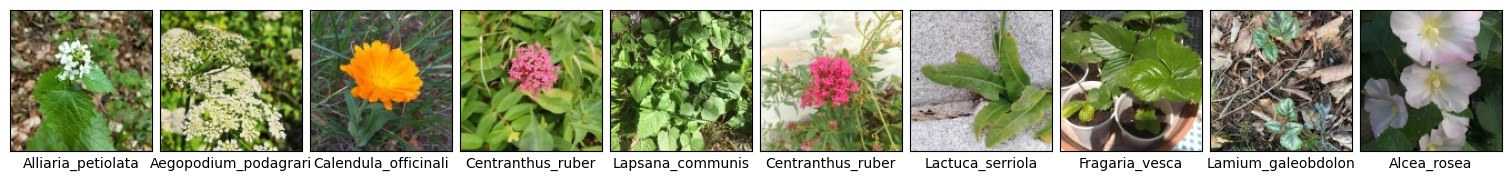

In [10]:
# Dummy data loaders. Feel free to change.
plant_train_ds = ImageDataset(Xp_train, yp_train, transform=transform)
plant_val_ds = ImageDataset(Xp_val, yp_val, transform=test_transform)
plant_train_loader = DataLoader(plant_train_ds, batch_size=32, shuffle=True)
plant_val_loader = DataLoader(plant_val_ds, batch_size=32, shuffle=False)

# Test data loader. Leave this unchanged.
plant_test_ds = ImageDataset(Xp_test, yp_test, transform=test_transform)
plant_test_loader = DataLoader(plant_test_ds, batch_size=32, shuffle=False)

visualize_random(plant_train_ds, idx_to_plant)

We can't train a complex model from scratch on such little data. Hence, we will explore transfer learning using pre-trained models. As discussed in the lectures, transfer learning means leveraging a model trained on one task (dataset) and adapting it to a new task​. Typically, this is solved by copying over layers and their weigths into a new model, ideally from a model that was pretrained on a sufficiently similar task. This can significantly speed up convergence and improve performance on the new task (positive transfer)​, but it is also possible that the model performs worse than training from scratch (negative transfer).

We will explore the following scenario's:

**Cross-domain Transfer**  
This means using a model pre-trained on a very different dataset or domain, but one where perhaps much more data is available. The easiest approach is to use a network pre-trained on ImageNet. See [the Pytorch documentation](https://pytorch.org/vision/stable/models.html) for a good overview of available pretrained models. Tips:
* Remember that your models must be smaller than 100MB to be uploaded to GitHub, so consider smaller ResNets, EfficientNet, or MobileNet. The list above only shows the number of parameters so you'll need to multiply by 4 (32bit precision weigths take 4 bytes each). Hence a model with 20M parameters will weight about 80MB on disk. Do check this before you spend a lot of resources on a model you can't submit. 
* When you have chosen a model, read up as much as you can. Clicking on the model link will give you the most important information. It is important to adjust your input data to approximate how the model was trained. For instance, check the input resolution and how the images where normalized. You may want to rescale and normalize your input images accordingly (also note that some models use striding in the first layer). Check what the dense part of the model looks like and whether they flatten the final feature map or do global average pooling, so you can properly design your classification head and any dense layers.

<img src="https://storage.googleapis.com/lds-media/images/transfer-learning-fine-tuning-approach.width-1200.jpg" width="700" />

When doing transfer learning, you can freeze all or some layers of the pre-trained model (i.e. keep their weights fixed) and only train the rest. Consider that the plant dataset is quite small. Explore the following options:  

* Keeping all convolutional layers frozen, and only finetune the last layers (the classification head)
* Freezing the convolutional layers except for the last few convolutional layers. It's up to you to decide how many you unfreeze. 

Create, train, and store one model for each. Call them `model_2_frozen` and `model_2_unfrozen`, respectively. Train them each for sufficiently long to evaluate which technique is best. 

**Within-domain Transfer**  
This means using a model pre-trained on a similar domain as your target dataset. Use the model you trained on the birds dataset in Question 1, add a new classification head, and then fine-tune it on the target dataset. You will need to rebuild the model and load your stored weights from file. The code from Question 1 can be reused for this (see for instance the ModelLogger class). Although birds are not exactly the same domain as plants, it's close enough for interesting experiments.

Explore the same two options for finetuning as in the previous question. Create, train, and store one model for each. Call them `model_2_birds_frozen` and `model_2_birds_unfrozen`, respectively. Train them each for sufficiently long to evaluate which technique is best. Note that, since the birds datasets is more similar, it might make sense to unfreeze more layers (or even all of them, finetuning the model end-to-end). 

Compare Performance: Evaluate the target dataset (PLantNet) test set accuracy for all 4 models. Which approach gives the best results? Observe the training curves. Which models converge faster? Do you notice heavier overfitting with some approaches? Can you overcome that with data augmentation or other techniques?

**Grading**  
You can gain up to 4 points for your code and explanation of your design process and decisions. Show the code for loading pre-trained models and fine-tuning, include it in this notebook and document it well. If we can't understand what you are doing we can't give you good grades. Provide a comparison table of results (accuracy on the test set) for the different approaches. Discuss the observed learning curves, the speed of learning/converge, and overfitting behavior of the different techniques. 
Use the evaluation framework from Question 1 wherever possible to restore models, track results, and evaluate on the test set. Discuss which transfer learning strategy worked best and why that might be. If any approach surprisingly underperforms, explain possible reasons. We encourage you to go beyond the course material and find explanations in the literature or other credible sources. Try to be detailed but stay to the point, remain professional, and try to remain within 1 page (less is also ok).

The other 2 points depend on the performance of your best model (accuracy), evaluated on the test set of the Plant dataset, graded the same way as part 1.


#### Cross-domain Transfer

Training Frozen Model...


/home/scur0852/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20 - Train Loss: 3.2227, Train Acc: 0.1234, Val Loss: 2.8128, Val Acc: 0.2437
Epoch 2/20 - Train Loss: 2.3509, Train Acc: 0.3750, Val Loss: 2.5010, Val Acc: 0.3312
Epoch 3/20 - Train Loss: 1.7853, Train Acc: 0.5969, Val Loss: 2.2542, Val Acc: 0.3625
Epoch 4/20 - Train Loss: 1.4959, Train Acc: 0.6656, Val Loss: 2.1572, Val Acc: 0.3500
Epoch 5/20 - Train Loss: 1.2922, Train Acc: 0.7375, Val Loss: 2.0710, Val Acc: 0.4125
Epoch 6/20 - Train Loss: 1.0695, Train Acc: 0.8063, Val Loss: 1.9985, Val Acc: 0.4188
Epoch 7/20 - Train Loss: 0.9590, Train Acc: 0.8125, Val Loss: 1.9696, Val Acc: 0.4313
Epoch 8/20 - Train Loss: 0.8557, Train Acc: 0.8406, Val Loss: 1.9565, Val Acc: 0.4250
Epoch 9/20 - Train Loss: 0.7778, Train Acc: 0.8531, Val Loss: 1.9515, Val Acc: 0.4562
Epoch 10/20 - Train Loss: 0.7449, Train Acc: 0.8578, Val Loss: 1.9451, Val Acc: 0.4125
Epoch 11/20 - Train Loss: 0.6405, Train Acc: 0.9031, Val Loss: 1.9312, Val Acc: 0.4313
Epoch 12/20 - Train Loss: 0.6219, Train Acc: 0.9031,

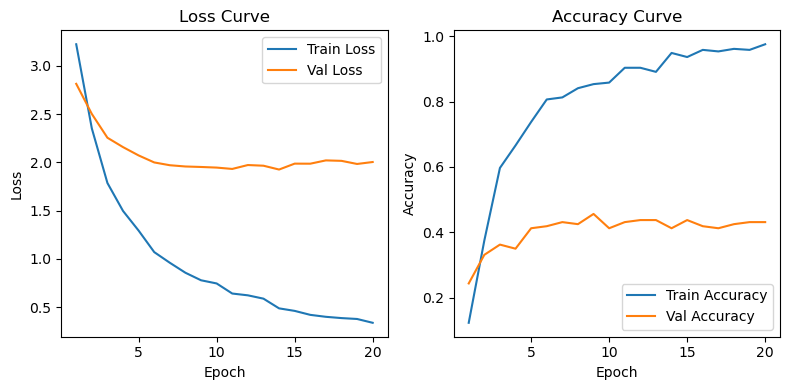

Best validation accuracy: 0.4375 at epoch 8 (smoothed over 3 epochs)
Test Accuracy: 0.4400

Training Unfrozen Model...


/home/scur0852/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(


Epoch 1/20 - Train Loss: 3.0482, Train Acc: 0.1344, Val Loss: 2.5755, Val Acc: 0.3750
Epoch 2/20 - Train Loss: 1.6543, Train Acc: 0.8375, Val Loss: 1.9789, Val Acc: 0.5062
Epoch 3/20 - Train Loss: 0.7168, Train Acc: 0.9641, Val Loss: 1.7000, Val Acc: 0.5563
Epoch 4/20 - Train Loss: 0.2389, Train Acc: 0.9938, Val Loss: 1.5729, Val Acc: 0.6000
Epoch 5/20 - Train Loss: 0.0813, Train Acc: 1.0000, Val Loss: 1.5136, Val Acc: 0.5938
Epoch 6/20 - Train Loss: 0.0425, Train Acc: 1.0000, Val Loss: 1.4900, Val Acc: 0.5875
Epoch 7/20 - Train Loss: 0.0307, Train Acc: 1.0000, Val Loss: 1.4688, Val Acc: 0.6062
Epoch 8/20 - Train Loss: 0.0209, Train Acc: 1.0000, Val Loss: 1.4508, Val Acc: 0.6062
Epoch 9/20 - Train Loss: 0.0171, Train Acc: 1.0000, Val Loss: 1.4486, Val Acc: 0.6000
Epoch 10/20 - Train Loss: 0.0145, Train Acc: 1.0000, Val Loss: 1.4430, Val Acc: 0.5938
Epoch 11/20 - Train Loss: 0.0111, Train Acc: 1.0000, Val Loss: 1.4310, Val Acc: 0.5687
Epoch 12/20 - Train Loss: 0.0105, Train Acc: 1.0000,

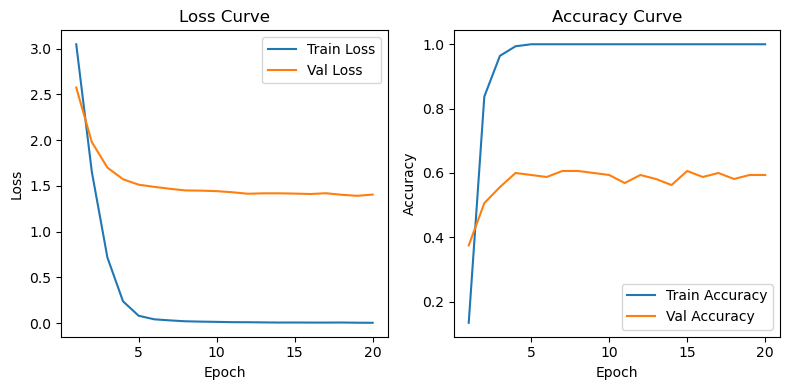

Best validation accuracy: 0.6042 at epoch 8 (smoothed over 3 epochs)
Test Accuracy: 0.6300

Reporting Frozen Model:


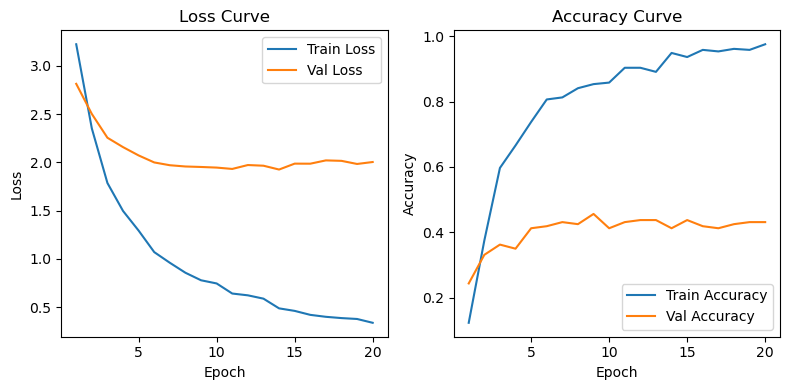

Best validation accuracy: 0.4375 at epoch 8 (smoothed over 3 epochs)
Test Accuracy: 0.4400

Reporting Unfrozen Model:


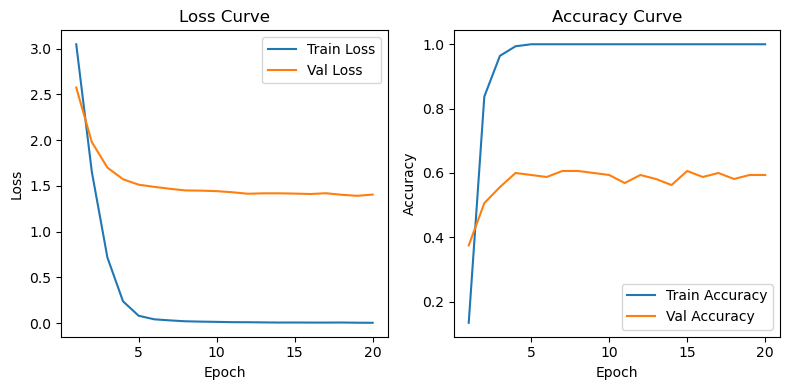

Best validation accuracy: 0.6042 at epoch 8 (smoothed over 3 epochs)
Test Accuracy: 0.6300


In [11]:
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim
import torchvision.models as models

num_classes = 25  
num_epochs = 20
batch_size = 128
learning_rate_frozen = 0.001
learning_rate_unfrozen = 0.0001
device = 'cuda' if torch.cuda.is_available() else 'cpu'

logger_frozen = ModelLogger(model_name="model_2_frozen", test_loader=plant_test_loader)
logger_unfrozen = ModelLogger(model_name="model_2_unfrozen", test_loader=plant_test_loader)

def train_model(model, optimizer, criterion, logger, train_loader, val_loader, num_epochs):
    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct, total = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_loss /= len(train_loader.dataset)
        train_acc = train_correct / total

        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)

        val_loss /= len(val_loader.dataset)
        val_acc = val_correct / val_total

        # Log metrics
        logger.log_epoch(train_loss, val_loss, train_acc, val_acc)
        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    logger.finalize(model)

# === Frozen Model ===
print("Training Frozen Model...")
model_2_frozen = models.resnet50(weights=True)

# Freeze all convolutional layers (except for the last fully connected layer)
for param in model_2_frozen.parameters():
    param.requires_grad = False

# Changing the last fully connected (FC) layer (classification head)
model_2_frozen.fc = nn.Linear(model_2_frozen.fc.in_features, num_classes)

optimizer_frozen = optim.Adam(model_2_frozen.parameters(), lr=learning_rate_frozen)
criterion = nn.CrossEntropyLoss()

train_model(model_2_frozen, optimizer_frozen, criterion, logger_frozen, plant_train_loader, plant_val_loader, num_epochs)

# === Unfrozen Model ===
print("\nTraining Unfrozen Model...")
model_2_unfrozen = models.resnet50(pretrained=True)

# Unfreeze the last 4 layers
for param in model_2_unfrozen.layer4.parameters():
    param.requires_grad = True

# Changing the last fully connected (FC) layer (classification head)
model_2_unfrozen.fc = nn.Linear(model_2_unfrozen.fc.in_features, num_classes)

optimizer_unfrozen = optim.Adam(model_2_unfrozen.parameters(), lr=learning_rate_unfrozen)

train_model(model_2_unfrozen, optimizer_unfrozen, criterion, logger_unfrozen, plant_train_loader, plant_val_loader, num_epochs)

# Results
print("\nReporting Frozen Model:")
logger_frozen.report(model_2_frozen)

print("\nReporting Unfrozen Model:")
logger_unfrozen.report(model_2_unfrozen)

#### Within-domain Transfer

In [29]:
import torch.optim as optim

class ResidualBlock(nn.Module):
    def __init__(self, input_dimension, output_dimension, stride=1):
        super(ResidualBlock, self).__init__()
        self.left = nn.Sequential(
            nn.Conv2d(input_dimension, output_dimension, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(output_dimension),
            nn.ReLU(inplace=True),
            nn.Conv2d(output_dimension, output_dimension, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(output_dimension)
        )
        self.shortcut = nn.Sequential()
        if stride != 1 or input_dimension != output_dimension:
            self.shortcut = nn.Sequential(
                nn.Conv2d(input_dimension, output_dimension, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(output_dimension)
            )

    def forward(self, x):
        out = self.left(x)
        out = out + self.shortcut(x)
        out = F.relu(out)
        return out

class ResNetLightningTransfer(pl.LightningModule):
    def __init__(self, num_classes=25, freeze=True):
        super(ResNetLightningTransfer, self).__init__()
        self.inchannel = 64
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.layer1 = self.make_layer(ResidualBlock, 64, 2, stride=1)
        self.layer2 = self.make_layer(ResidualBlock, 128, 2, stride=2)
        self.layer3 = self.make_layer(ResidualBlock, 256, 2, stride=2)
        self.layer4 = self.make_layer(ResidualBlock, 512, 2, stride=2)
        
        # Redefine the classifier for 25 classes
        self.fc = nn.Linear(512, num_classes)
        self.criterion = nn.CrossEntropyLoss()

        # Load weights correctly
        self.load_pretrained_weights()

        if freeze:
            self.freeze_feature_extractor()

    def make_layer(self, block, channels, num_blocks, stride):
        """Creates a ResNet layer with multiple residual blocks"""
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.inchannel, channels, stride))
            self.inchannel = channels
        return nn.Sequential(*layers)

    def load_pretrained_weights(self):
        checkpoint = torch.load("model_resnet.pt", map_location=self.device)
        
        # Get model state dict but ignore `fc` layer
        model_dict = self.state_dict()
        pretrained_dict = {k: v for k, v in checkpoint.items() if k in model_dict and v.shape == model_dict[k].shape}
        
        # Update the model's state_dict with matched parameters
        model_dict.update(pretrained_dict)
        self.load_state_dict(model_dict)

        print("Pretrained model loaded (excluding mismatched layers)!")

    def freeze_feature_extractor(self):
        """Freeze all layers except the final classifier"""
        for param in self.parameters():
            param.requires_grad = False
        for param in self.fc.parameters():  
            param.requires_grad = True  # Train only the classifier

    def forward(self, x):
        out = self.conv1(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.adaptive_avg_pool2d(out, (1, 1))  # Adaptive pooling
        out = out.view(out.size(0), -1)  # Flatten the tensor
        out = self.fc(out)
        return out

    def training_step(self, batch, batch_idx):
        images, labels = batch
        logits = self(images)
        loss = self.criterion(logits, labels)
        preds = logits.argmax(dim=1)
        acc = (preds == labels).float().mean()

        self.log("train_loss", loss, prog_bar=True, on_epoch=True)
        self.log("train_acc", acc, prog_bar=True, on_epoch=True)

        return loss

    def validation_step(self, batch, batch_idx):
        images, labels = batch
        logits = self(images)
        loss = self.criterion(logits, labels)
        preds = logits.argmax(dim=1)
        acc = (preds == labels).float().mean()

        self.log("val_loss", loss, prog_bar=True, on_epoch=True)
        self.log("val_acc", acc, prog_bar=True, on_epoch=True)

        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
        return [optimizer], [scheduler]
      
    def train_dataloader(self):
        return train_dataloader  # Make sure this is properly returned

    def val_dataloader(self):
        return val_dataloader

In [35]:
def train_model(model, optimizer, criterion, logger, train_loader, val_loader, num_epochs):
    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct, total = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_loss /= len(train_loader.dataset)
        train_acc = train_correct / total

        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)

        val_loss /= len(val_loader.dataset)
        val_acc = val_correct / val_total

        # Log metrics
        logger.log_epoch(train_loss, val_loss, train_acc, val_acc)
        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    logger.finalize(model)


Training Frozen Model...
Pretrained model loaded (excluding mismatched layers)!
Epoch 1/20 - Train Loss: 3.2244, Train Acc: 0.0281, Val Loss: 3.2014, Val Acc: 0.0437
Epoch 2/20 - Train Loss: 3.0972, Train Acc: 0.0734, Val Loss: 3.0979, Val Acc: 0.1187
Epoch 3/20 - Train Loss: 3.0417, Train Acc: 0.0922, Val Loss: 3.0062, Val Acc: 0.1187
Epoch 4/20 - Train Loss: 3.0093, Train Acc: 0.1187, Val Loss: 2.9986, Val Acc: 0.1313
Epoch 5/20 - Train Loss: 2.9647, Train Acc: 0.1250, Val Loss: 2.9505, Val Acc: 0.1812
Epoch 6/20 - Train Loss: 2.9001, Train Acc: 0.1516, Val Loss: 2.9349, Val Acc: 0.1875
Epoch 7/20 - Train Loss: 2.8835, Train Acc: 0.1734, Val Loss: 2.9101, Val Acc: 0.1875
Epoch 8/20 - Train Loss: 2.8579, Train Acc: 0.1703, Val Loss: 2.8890, Val Acc: 0.1750
Epoch 9/20 - Train Loss: 2.8488, Train Acc: 0.1750, Val Loss: 2.8701, Val Acc: 0.1812
Epoch 10/20 - Train Loss: 2.8254, Train Acc: 0.1703, Val Loss: 2.8629, Val Acc: 0.2062
Epoch 11/20 - Train Loss: 2.7824, Train Acc: 0.2000, Val Lo

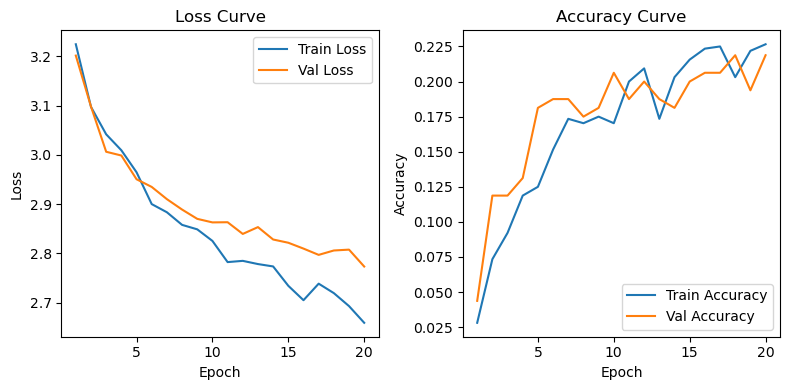

Best validation accuracy: 0.2104 at epoch 17 (smoothed over 3 epochs)
Test Accuracy: 0.1800
Training Unfrozen Model...
Pretrained model loaded (excluding mismatched layers)!
Epoch 1/20 - Train Loss: 3.0756, Train Acc: 0.0906, Val Loss: 3.1198, Val Acc: 0.0750
Epoch 2/20 - Train Loss: 2.7074, Train Acc: 0.1953, Val Loss: 2.8452, Val Acc: 0.1562
Epoch 3/20 - Train Loss: 2.5136, Train Acc: 0.2469, Val Loss: 2.7531, Val Acc: 0.2062
Epoch 4/20 - Train Loss: 2.3060, Train Acc: 0.3187, Val Loss: 2.6185, Val Acc: 0.2188
Epoch 5/20 - Train Loss: 2.1465, Train Acc: 0.3531, Val Loss: 2.7002, Val Acc: 0.2062
Epoch 6/20 - Train Loss: 2.0093, Train Acc: 0.4219, Val Loss: 2.4698, Val Acc: 0.3187
Epoch 7/20 - Train Loss: 1.8875, Train Acc: 0.4437, Val Loss: 2.6047, Val Acc: 0.2750
Epoch 8/20 - Train Loss: 1.7691, Train Acc: 0.4813, Val Loss: 2.7196, Val Acc: 0.2437
Epoch 9/20 - Train Loss: 1.6932, Train Acc: 0.5250, Val Loss: 2.4927, Val Acc: 0.3312
Epoch 10/20 - Train Loss: 1.5360, Train Acc: 0.5719,

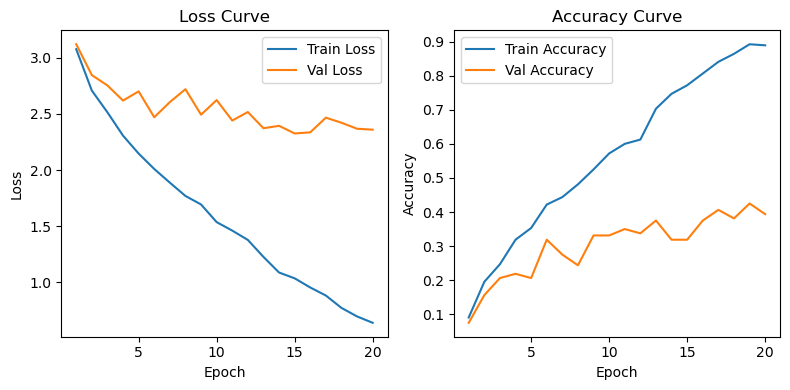

Best validation accuracy: 0.4042 at epoch 18 (smoothed over 3 epochs)
Test Accuracy: 0.3900

Reporting Frozen Model:


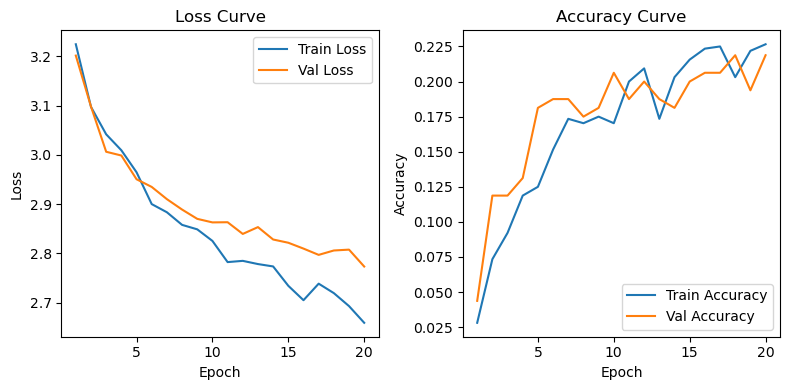

Best validation accuracy: 0.2104 at epoch 17 (smoothed over 3 epochs)
Test Accuracy: 0.1800

Reporting Unfrozen Model:


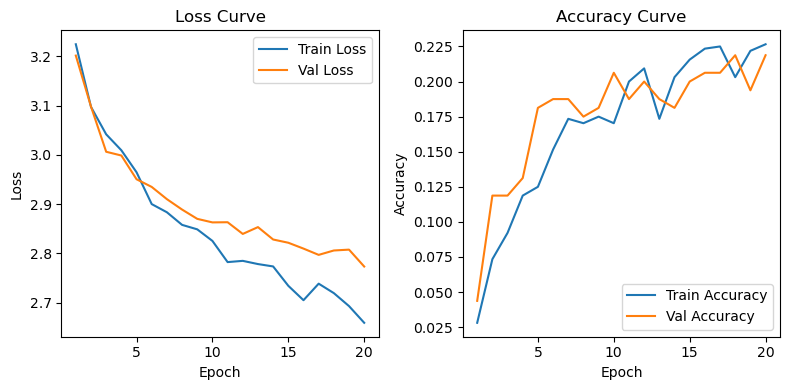

Best validation accuracy: 0.2104 at epoch 17 (smoothed over 3 epochs)
Test Accuracy: 0.3900


In [44]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# === Frozen Model ===
print("Training Frozen Model...")
frozen_logger = ModelLogger(model_name="model_2_birds_frozen", test_loader=plant_test_loader)

learning_rate_frozen = 0.001
num_epochs = 20

model_2_birds_frozen = ResNetLightningTransfer(num_classes=25, freeze=True)
optimizer_frozen = optim.Adam(model_2_birds_frozen.parameters(), lr=learning_rate_frozen)
criterion_frozen = nn.CrossEntropyLoss()
train_model(model_2_birds_frozen, optimizer_frozen, criterion_frozen, frozen_logger, plant_train_loader, plant_val_loader, num_epochs)

# === Unfrozen Model ===
print("Training Unfrozen Model...")
unfrozen_logger = ModelLogger(model_name="model_2_birds_unfrozen", test_loader=plant_test_loader)

learning_rate_unfrozen = 0.0001
num_epochs = 20

model_2_birds_unfrozen = ResNetLightningTransfer(num_classes=25, freeze=False)
optimizer_unfrozen = optim.Adam(model_2_birds_unfrozen.parameters(), lr=learning_rate_unfrozen)
criterion_unfrozen = nn.CrossEntropyLoss()
train_model(model_2_birds_unfrozen, optimizer_unfrozen, criterion_unfrozen, unfrozen_logger, plant_train_loader, plant_val_loader, num_epochs)

# Results
print("\nReporting Frozen Model:")
frozen_logger.report(model_2_birds_frozen)

print("\nReporting Unfrozen Model:")
frozen_logger.report(model_2_birds_unfrozen)

## Question 3: Flowers (6 points)

Next, we want to classify flowers. This time, the target dataset is even smaller (we use the 'micro' version). Therefore, we will explore meta-learning, and especially few-shot learning. In few-shot classification, the goal is to classify new classes using only a few examples (e.g. 5 examples) of each class. A popular and simple approach for this is [Prototypical Networks](https://arxiv.org/pdf/1703.05175)​. Let's try that to classify our insects.

In [12]:
# Do not change this code and don't overwrite the data splits created below.
FLW = openml.datasets.get_dataset(44283, download_all_files=True)
data_dir_flower = Path(openml.config.get_cache_directory())/'datasets'/str(FLW.dataset_id)/"FLW_Mini"/"images"
Xi_all, yi_all, categorical_indicator, attribute_names = FLW.get_data(target=FLW.default_target_attribute)
Xi_all["file_path"] = Xi_all["FILE_NAME"].apply(lambda x: os.path.join(data_dir_flower, x))
print("The dataset has {} images of insects and {} classes".format(Xi_all.shape[0], len(np.unique(yi_all))))

# Map labels to integers
flower_to_idx = {label: idx for idx, label in enumerate(sorted(yi_all.unique()))}
idx_to_flower = {idx: label for label, idx in flower_to_idx.items()}
yi_all = yi_all.map(flower_to_idx)

The dataset has 4080 images of insects and 102 classes


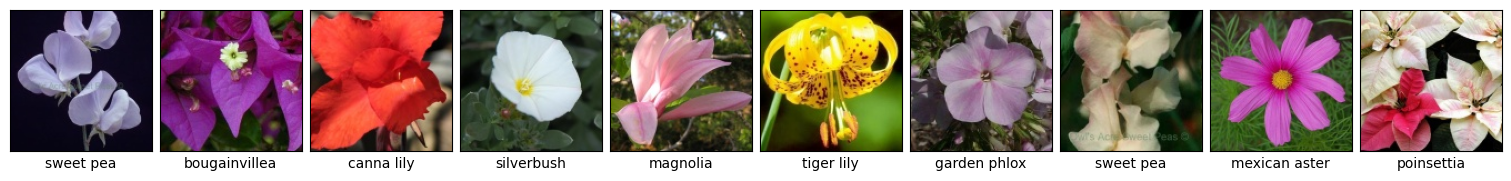

In [13]:
flower_ds = ImageDataset(Xi_all, yi_all, transform=transform)
flower_loader = DataLoader(flower_ds, batch_size=32, shuffle=True)
visualize_random(flower_ds, idx_to_flower)

Few-shot learning trains a model to quickly adapt to new classification tasks using only a few labeled examples. In N-way K-shot classification, the model is asked to distinguish between N classes, given only K examples per class. 

#### Query and Support sets
Training is performed through a series of episodes, each simulating a small classification task:
* Each episode includes a support set (e.g., 5 classes × 5 samples each = 5-way 5-shot) that the model uses to form class representations.
* A separate query set contains new samples from the same classes, used to evaluate how well the model can classify after seeing only those few examples.

By repeatedly training on many such tasks, the model learns to generalize to new tasks — even with minimal data.

To evaluate your implementation, we first randomly select 60 classes, and then use 40 for meta-training, 10 for meta-validation, and 10 for meta-testing. Below we also provide code for an episodic data loader that returns batches of support and query sets.

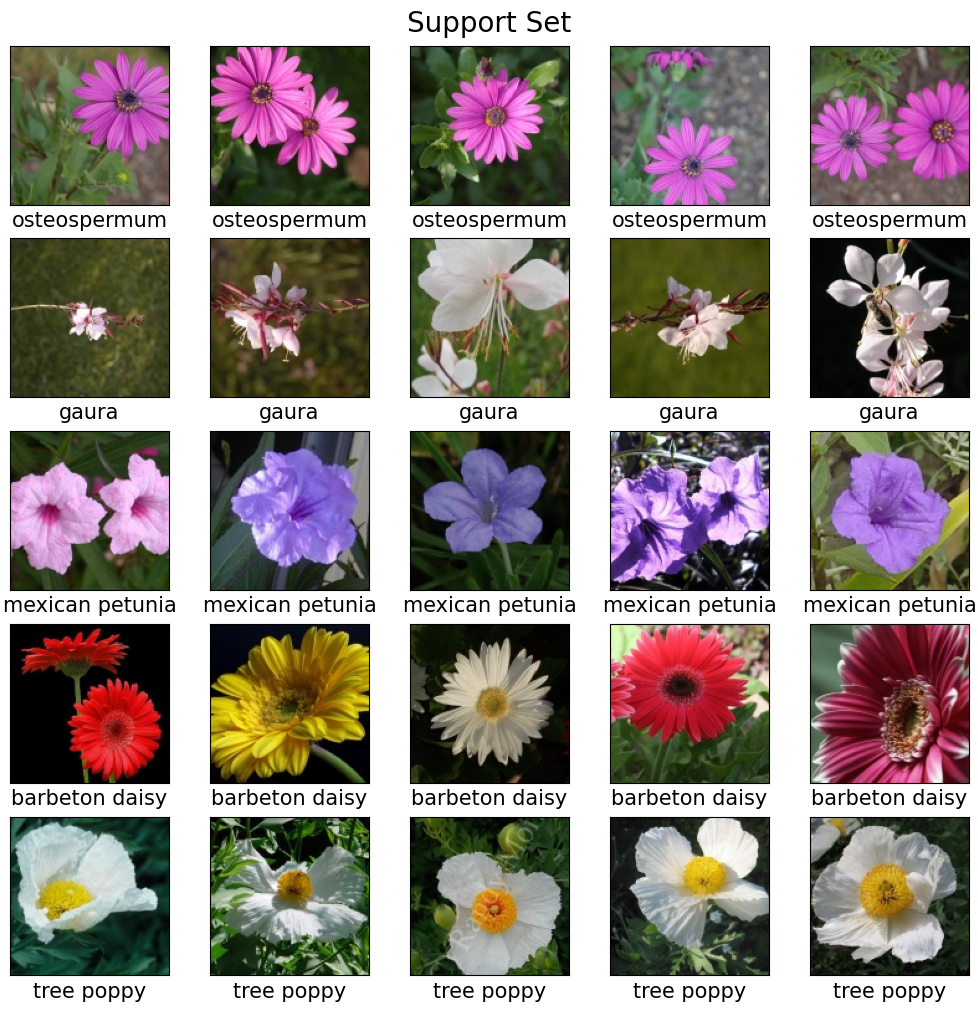

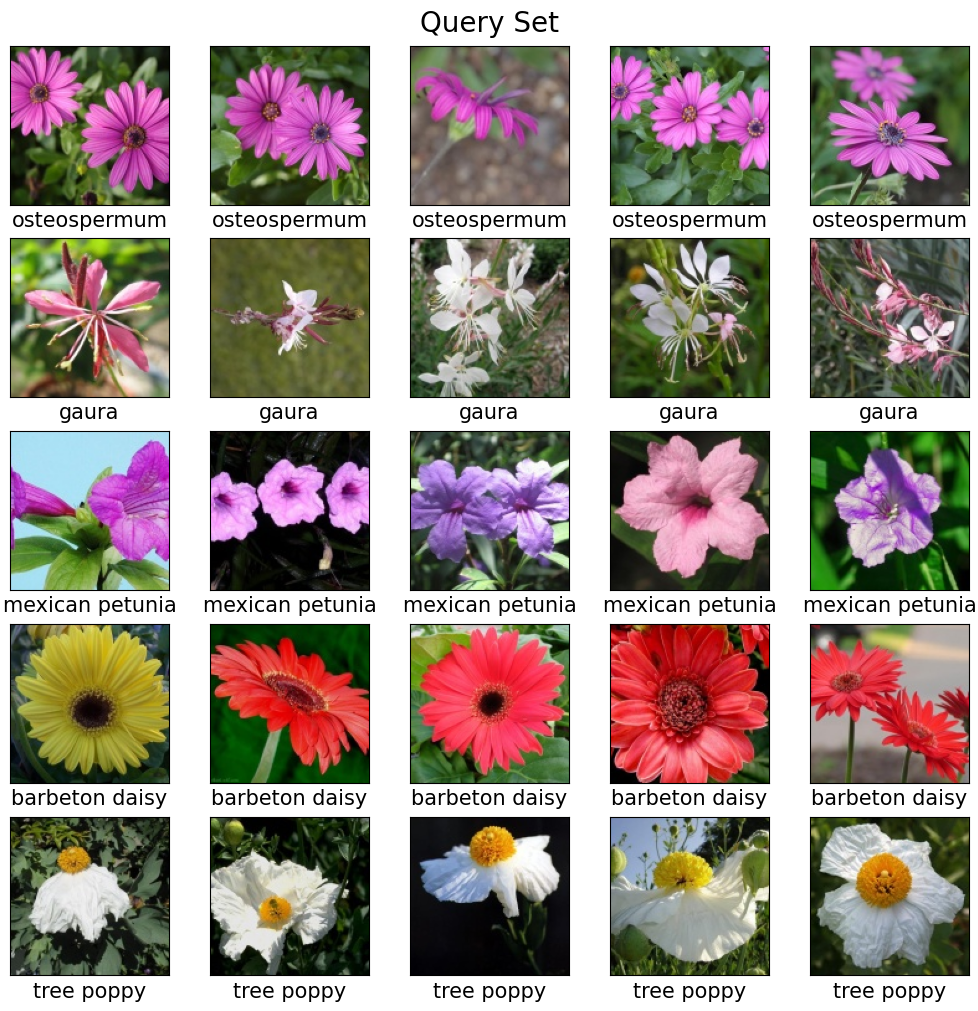

In [19]:
# Split classes into train, validation, and test sets
all_classes = flower_ds.classes
random.shuffle(all_classes)

num_classes = len(all_classes)
train_classes = all_classes[:int(0.6 * num_classes)]
val_classes = all_classes[int(0.6 * num_classes):int(0.8 * num_classes)]
test_classes = all_classes[int(0.8 * num_classes):]

# Our train and test datasets
train_dataset = SubsetByClass(flower_ds, train_classes)
test_dataset = SubsetByClass(flower_ds, test_classes)
val_dataset = SubsetByClass(flower_ds, val_classes)

# Our train and test episodic samplers
train_sampler = EpisodicSampler(train_dataset, episodes_per_epoch=100, N_way=5, K_shot=5, Q_query=5)
test_sampler = EpisodicSampler(test_dataset, episodes_per_epoch=100, N_way=5, K_shot=5, Q_query=5)
val_sampler = EpisodicSampler(val_dataset, episodes_per_epoch=100, N_way=5, K_shot=5, Q_query=5)

# Example usage
for support_x, support_y, query_x, query_y, selected_classes in train_sampler:
    visualize_sets(support_x, support_y, idx_to_flower, selected_classes, "Support Set")
    visualize_sets(query_x, query_y, idx_to_flower, selected_classes, "Query Set")
    break

#### Implementing ProtoNets
Prototypical Networks (ProtoNets) work by learning an embedding of images into a feature space, similar to how CNNs operate. However, instead of learning a linear layer to map embeddings to class labels, ProtoNets compute a prototype for each class — defined as the mean of the embeddings of the support examples belonging to that class. Classification is then performed by finding the nearest prototype to the query image in the embedding space (typically using Euclidean distance).

In each episode, you compute the prototype of each class in the **support set** (the mean of feature vectors for that class). Then classify **query images** by finding the nearest class prototype in feature space. During training, the network’s embedding is updated to **reduce the distance between query images and the correct class prototype**. The prototypical network essentially learns a metric space where each class forms a cluster around a prototype​. This is illustrated below.

<img src="https://www.researchgate.net/publication/364516993/figure/fig2/AS:11431281091153899@1666323832559/The-schematic-of-architecture-of-Prototypical-Network_W640.jpg" width="600">


Implement this as follows:  
* Use a small CNN network (such as a 4-layer CNN) or a small pretrained network such as MobileNetv2 or ResNet18) as the embedding function. You should NOT freeze it since we need to update the embedding to allow few-shot learning.
* For each training episode, sample a set of N classes and K support examples per class from the training data (N-way K-shot). Also sample some query examples for those classes.
* Compute support embeddings, average them per class to form prototypes.
* Compute query embeddings and classify them by nearest prototype (you can use Euclidean distance).
* Use a loss (e.g. cross-entropy on the distances) to train the embedding network. 

**Training Strategy**  
Training a few-shot model involves many episodes. Iterate over a large number of episodes (potentially thousands), sampling different random class combinations. Limit N and K to small values initially (e.g. 5-way 1-shot, 5-way 5-shot). Monitor the model’s performance on meta-validation episodes (using held-out classes). You can measure accuracy across episodes by checking if the query samples are classified correctly.

**Evaluation**  
After training, evaluate your model on a set of unseen classes in a few-shot scenario (generated by `test_sampler`). Repeat this for multiple random episodes and report the average accuracy (few-shot classification accuracy). This simulates the model’s ability to generalize to new classes with minimal data.

**Discussion**  
Report the few-shot evaluation results. Did the prototypical network successfully adapt to new classes with only a few examples? For instance, you might achieve high accuracy on 5-way 5-shot tasks if the embedding is well-trained. Compare to a baseline: what if you tried to train a standard classifier on the same data? ProtoNets often outperform standard training in low-data regimes. Also discuss how you chose the backbone network. Try to be detailed but stay to the point, remain professional, and try to remain within 1 page (less is also ok).

**Grading**  
3 points will be awarded based on completeness and correctness of your code. Include all your code implementing the protonet and the training procedure. 
3 points will be awarded based on the detail and soundness of your discussion, and your justification of your design choices. The performance of your model is not graded directly in this part.

#### ProtoNet

In [34]:
from tqdm import tqdm
import torch.optim as optim

device = 'cuda' if torch.cuda.is_available() else 'cpu'

class EmbeddedCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  
            nn.BatchNorm2d(32),  
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1),  
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))  
        )

        # Dynamically determine the flattened size
        with torch.no_grad():
            dummy_input = torch.zeros(1, 3, 84, 84)  
            flattened_size = self.encoder(dummy_input).view(1, -1).shape[1]

        self.fc = nn.Linear(flattened_size, 128)  
        
    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1) 
        return x

class ProtoNet(nn.Module):
    def __init__(self, embed_model):
        super().__init__()
        self.embed = embed_model
        
    def compute_prototypes(self, support_embeddings, support_labels, n_classes):
        prototypes = []
        for c in range(n_classes):
            class_mask = support_labels == c
            class_embeddings = support_embeddings[class_mask]
            prototype = class_embeddings.mean(dim=0)
            prototypes.append(prototype)
        return torch.stack(prototypes)
    
    def forward(self, support_x, support_y, query_x, n_classes):
        support_emb = self.embed(support_x)
        query_emb = self.embed(query_x)
        prototypes = self.compute_prototypes(support_emb, support_y, n_classes)
        
        dists = torch.cdist(query_emb, prototypes) 
        return -dists  # negative distances as logits

class FewShotTrainer:
    def __init__(self, model, output_dir=".", model_name="protonet"):
        self.model = model
        self.output_dir = output_dir
        self.model_name = model_name
        self.history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
        
    def train(self, train_sampler, val_sampler, epochs=20, lr=1e-3, device='cuda'):
        self.model.to(device)
        optimizer = optim.Adam(self.model.parameters(), lr=lr)
        loss_fn = nn.CrossEntropyLoss()
        
        for epoch in range(1, epochs + 1):
            # --- Training Phase ---
            self.model.train()
            train_loss = 0.0
            train_correct = 0
            train_total = 0
            
            for support_x, support_y, query_x, query_y, _ in tqdm(train_sampler, desc=f"Epoch {epoch}/{epochs}"):
                support_x, support_y = support_x.to(device), support_y.to(device)
                query_x, query_y = query_x.to(device), query_y.to(device)
                n_classes = len(torch.unique(support_y))

                logits = self.model(support_x, support_y, query_x, n_classes)
                loss = loss_fn(logits, query_y)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                train_loss += loss.item()
                preds = torch.argmax(logits, dim=1)
                train_correct += (preds == query_y).sum().item()
                train_total += query_y.size(0)

            train_loss /= len(train_sampler)
            train_acc = train_correct / train_total

            # --- Validation Phase ---
            self.model.eval()
            val_loss = 0.0
            val_correct = 0
            val_total = 0

            with torch.no_grad():
                for support_x, support_y, query_x, query_y, _ in val_sampler:
                    support_x, support_y = support_x.to(device), support_y.to(device)
                    query_x, query_y = query_x.to(device), query_y.to(device)
                    n_classes = len(torch.unique(support_y))

                    logits = self.model(support_x, support_y, query_x, n_classes)
                    loss = loss_fn(logits, query_y)

                    val_loss += loss.item()
                    preds = torch.argmax(logits, dim=1)
                    val_correct += (preds == query_y).sum().item()
                    val_total += query_y.size(0)

            val_loss /= len(val_sampler)
            val_acc = val_correct / val_total

            self.history["train_loss"].append(train_loss)
            self.history["train_acc"].append(train_acc)
            self.history["val_loss"].append(val_loss)
            self.history["val_acc"].append(val_acc)

            print(f"Epoch {epoch}/{epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
                  f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

        model_path = f"{self.output_dir}/{self.model_name}_epoch_{epoch}.pt"
        torch.save(self.model.state_dict(), model_path)

        metrics_path = f"{self.output_dir}/{self.model_name}_metrics.json"
        with open(metrics_path, 'w') as f:
            json.dump(self.history, f, indent=4)

    def evaluate(self, test_sampler, device='cuda'):
        self.model.eval()
        correct = 0
        total = 0
        
        with torch.no_grad():
            for support_x, support_y, query_x, query_y, _ in test_sampler:
                support_x, support_y = support_x.to(device), support_y.to(device)
                query_x, query_y = query_x.to(device), query_y.to(device)
                n_classes = len(torch.unique(support_y))

                logits = self.model(support_x, support_y, query_x, n_classes)
                preds = torch.argmax(logits, dim=1)

                correct += (preds == query_y).sum().item()
                total += query_y.size(0)

        accuracy = correct / total
        print(f"Few-shot Classification Accuracy: {accuracy * 100:.2f}%")
        return accuracy

    def plot_learning_curves(self):
        epochs = range(1, len(self.history["train_loss"]) + 1)
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.plot(epochs, self.history["train_loss"], label='Train Loss')
        plt.plot(epochs, self.history["val_loss"], label='Validation Loss')
        plt.title("Loss Curve")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(epochs, self.history["train_acc"], label='Train Accuracy')
        plt.plot(epochs, self.history["val_acc"], label='Validation Accuracy')
        plt.title("Accuracy Curve")
        plt.legend()

        plt.show()

# # to measure similarity between query samples and prototypes
# def euclidean_distance(a, b):
#     return ((a - b) ** 2).sum(dim=-1)

Epoch 1/20: 100%|██████████| 100/100 [00:04<00:00, 21.90it/s]


Epoch 1/20 - Train Loss: 0.8708, Train Acc: 0.6752 | Val Loss: 0.8711, Val Acc: 0.6628


Epoch 2/20: 100%|██████████| 100/100 [00:04<00:00, 21.97it/s]


Epoch 2/20 - Train Loss: 0.7747, Train Acc: 0.7148 | Val Loss: 0.8629, Val Acc: 0.6644


Epoch 3/20: 100%|██████████| 100/100 [00:04<00:00, 21.95it/s]


Epoch 3/20 - Train Loss: 0.7624, Train Acc: 0.7112 | Val Loss: 0.8227, Val Acc: 0.6868


Epoch 4/20: 100%|██████████| 100/100 [00:04<00:00, 21.86it/s]


Epoch 4/20 - Train Loss: 0.7345, Train Acc: 0.7388 | Val Loss: 0.8008, Val Acc: 0.7008


Epoch 5/20: 100%|██████████| 100/100 [00:04<00:00, 22.06it/s]


Epoch 5/20 - Train Loss: 0.7306, Train Acc: 0.7352 | Val Loss: 0.8298, Val Acc: 0.6764


Epoch 6/20: 100%|██████████| 100/100 [00:04<00:00, 22.08it/s]


Epoch 6/20 - Train Loss: 0.7401, Train Acc: 0.7304 | Val Loss: 0.7805, Val Acc: 0.6924


Epoch 7/20: 100%|██████████| 100/100 [00:04<00:00, 22.23it/s]


Epoch 7/20 - Train Loss: 0.7402, Train Acc: 0.7300 | Val Loss: 0.8163, Val Acc: 0.6884


Epoch 8/20: 100%|██████████| 100/100 [00:04<00:00, 22.21it/s]


Epoch 8/20 - Train Loss: 0.6987, Train Acc: 0.7384 | Val Loss: 0.7657, Val Acc: 0.7064


Epoch 9/20: 100%|██████████| 100/100 [00:04<00:00, 22.23it/s]


Epoch 9/20 - Train Loss: 0.6669, Train Acc: 0.7592 | Val Loss: 0.7363, Val Acc: 0.7172


Epoch 10/20: 100%|██████████| 100/100 [00:04<00:00, 22.14it/s]


Epoch 10/20 - Train Loss: 0.6636, Train Acc: 0.7532 | Val Loss: 0.8160, Val Acc: 0.6676


Epoch 11/20: 100%|██████████| 100/100 [00:04<00:00, 22.16it/s]


Epoch 11/20 - Train Loss: 0.6895, Train Acc: 0.7460 | Val Loss: 0.8155, Val Acc: 0.6836


Epoch 12/20: 100%|██████████| 100/100 [00:04<00:00, 22.24it/s]


Epoch 12/20 - Train Loss: 0.6502, Train Acc: 0.7644 | Val Loss: 0.7519, Val Acc: 0.7016


Epoch 13/20: 100%|██████████| 100/100 [00:04<00:00, 22.26it/s]


Epoch 13/20 - Train Loss: 0.6779, Train Acc: 0.7568 | Val Loss: 0.7383, Val Acc: 0.7304


Epoch 14/20: 100%|██████████| 100/100 [00:04<00:00, 22.31it/s]


Epoch 14/20 - Train Loss: 0.6680, Train Acc: 0.7592 | Val Loss: 0.7306, Val Acc: 0.7100


Epoch 15/20: 100%|██████████| 100/100 [00:04<00:00, 22.35it/s]


Epoch 15/20 - Train Loss: 0.6631, Train Acc: 0.7596 | Val Loss: 0.7186, Val Acc: 0.7160


Epoch 16/20: 100%|██████████| 100/100 [00:04<00:00, 22.12it/s]


Epoch 16/20 - Train Loss: 0.6889, Train Acc: 0.7356 | Val Loss: 0.7201, Val Acc: 0.7264


Epoch 17/20: 100%|██████████| 100/100 [00:04<00:00, 22.21it/s]


Epoch 17/20 - Train Loss: 0.6219, Train Acc: 0.7776 | Val Loss: 0.7566, Val Acc: 0.7076


Epoch 18/20: 100%|██████████| 100/100 [00:04<00:00, 22.30it/s]


Epoch 18/20 - Train Loss: 0.6270, Train Acc: 0.7816 | Val Loss: 0.7529, Val Acc: 0.7036


Epoch 19/20: 100%|██████████| 100/100 [00:04<00:00, 22.17it/s]


Epoch 19/20 - Train Loss: 0.6119, Train Acc: 0.7716 | Val Loss: 0.7001, Val Acc: 0.7344


Epoch 20/20: 100%|██████████| 100/100 [00:04<00:00, 22.17it/s]


Epoch 20/20 - Train Loss: 0.6217, Train Acc: 0.7768 | Val Loss: 0.7401, Val Acc: 0.7196


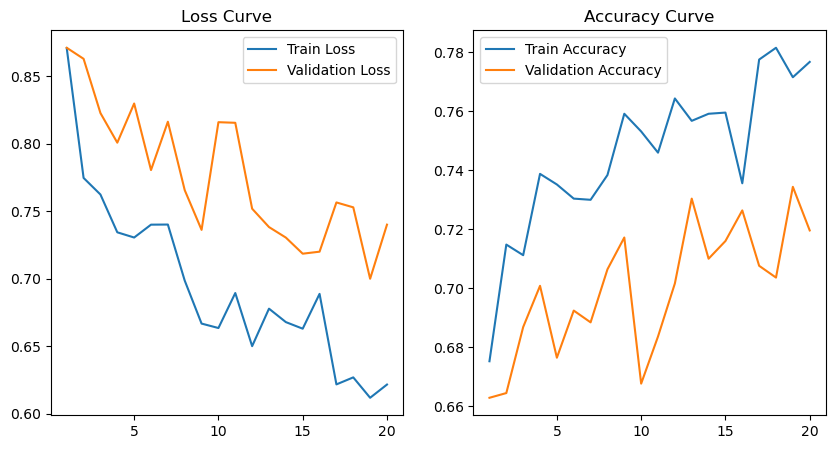

Few-shot Classification Accuracy: 72.04%


0.7204

In [35]:
embed_net = EmbeddedCNN()
embed_net.to(device)
proto_model = ProtoNet(embed_net)
proto_model.to(device)
trainer = FewShotTrainer(proto_model)

trainer.train(train_sampler, val_sampler, epochs=20, lr=1e-3, device=device)
trainer.plot_learning_curves()
trainer.evaluate(test_sampler, device=device)

### Baseline

In [81]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

class BaselineCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Downsampling

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))  # Global feature aggregation
        )

        with torch.no_grad():
            dummy_input = torch.zeros(1, 3, 84, 84)
            flattened_size = self.encoder(dummy_input).view(1, -1).shape[1]

        self.fc = nn.Linear(flattened_size, num_classes)

    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

def train_baseline(model, train_loader, val_loader, epochs, lr, device, output_dir=".", model_name="baseline3"):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()
    history = {
        "train_loss": [],
        "val_loss": [],
        "train_acc": [],
        "val_acc": []
    }

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss, total_correct, total_samples = 0, 0, 0

        # --- Training ---
        for _, _, query_x, query_y, _ in tqdm(train_loader, desc=f"Epoch {epoch}/{epochs}"):
            query_x, query_y = query_x.to(device), query_y.to(device)

            train_logits = model(query_x)  
            train_loss = loss_fn(train_logits, query_y)

            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

            total_loss += train_loss.item() * query_y.size(0)  # Accumulate loss
            total_correct += (train_logits.argmax(dim=1) == query_y).sum().item()
            total_samples += query_y.size(0)

        avg_train_loss = total_loss / total_samples
        train_accuracy = total_correct / total_samples

        # --- Evaluation ---
        model.eval()
        val_loss, val_correct, val_samples = 0, 0, 0

        with torch.no_grad():
            for _, _, query_x, query_y, _ in val_loader:
                query_x, query_y = query_x.to(device), query_y.to(device)

                val_logits = model(query_x)  
                batch_loss = loss_fn(val_logits, query_y)

                val_loss += batch_loss.item() * query_y.size(0)  # Accumulate loss
                val_correct += (val_logits.argmax(dim=1) == query_y).sum().item()
                val_samples += query_y.size(0)

        avg_val_loss = val_loss / val_samples
        val_accuracy = val_correct / val_samples

        history["train_loss"].append(avg_train_loss)
        history["val_loss"].append(avg_val_loss)
        history["train_acc"].append(train_accuracy)
        history["val_acc"].append(val_accuracy)

        print(f"Epoch {epoch}/{epochs} - Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f} | "
              f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

        model_path = f"{output_dir}/{model_name}_epoch_{epoch}.pt"
        torch.save(model.state_dict(), model_path)
        
def evaluate_baseline(model, test_loader, device='cuda'):
    model.eval()
    total_correct, total_samples = 0, 0

    with torch.no_grad():
        for _, _, query_x, query_y, _ in test_loader:  # Fixed test_loader reference
            query_x, query_y = query_x.to(device), query_y.to(device)

            logits = model(query_x)  # Forward pass
            preds = torch.argmax(logits, dim=1)

            total_correct += (preds == query_y).sum().item()
            total_samples += query_y.size(0)

    accuracy = total_correct / total_samples
    print(f"Test Accuracy: {accuracy:.4f}")
    return accuracy

In [82]:
num_classes = len(flower_ds.classes)
baseline_model = BaselineCNN(num_classes)
baseline_model.to(device)

train_baseline(baseline_model, train_sampler, val_sampler, epochs=20, lr=1e-3, device=device)
evaluate_baseline(baseline_model, test_sampler, device=device) 

Epoch 1/20: 100%|██████████| 100/100 [00:03<00:00, 27.69it/s]


Epoch 1/20 - Train Loss: 2.0990, Train Acc: 0.1780 | Val Loss: 1.6165, Val Acc: 0.2040


Epoch 2/20: 100%|██████████| 100/100 [00:03<00:00, 27.80it/s]


Epoch 2/20 - Train Loss: 1.6200, Train Acc: 0.1900 | Val Loss: 1.6257, Val Acc: 0.1956


Epoch 3/20: 100%|██████████| 100/100 [00:03<00:00, 27.79it/s]


Epoch 3/20 - Train Loss: 1.6225, Train Acc: 0.2052 | Val Loss: 1.6151, Val Acc: 0.2092


Epoch 4/20: 100%|██████████| 100/100 [00:03<00:00, 27.82it/s]


Epoch 4/20 - Train Loss: 1.6188, Train Acc: 0.1920 | Val Loss: 1.6134, Val Acc: 0.1964


Epoch 5/20: 100%|██████████| 100/100 [00:03<00:00, 27.93it/s]


Epoch 5/20 - Train Loss: 1.6190, Train Acc: 0.1908 | Val Loss: 1.6185, Val Acc: 0.2040


Epoch 6/20: 100%|██████████| 100/100 [00:03<00:00, 27.89it/s]


Epoch 6/20 - Train Loss: 1.6132, Train Acc: 0.1948 | Val Loss: 1.6167, Val Acc: 0.1956


Epoch 7/20: 100%|██████████| 100/100 [00:03<00:00, 27.89it/s]


Epoch 7/20 - Train Loss: 1.6164, Train Acc: 0.2032 | Val Loss: 1.6179, Val Acc: 0.1928


Epoch 8/20: 100%|██████████| 100/100 [00:03<00:00, 27.91it/s]


Epoch 8/20 - Train Loss: 1.6167, Train Acc: 0.1916 | Val Loss: 1.6121, Val Acc: 0.2064


Epoch 9/20: 100%|██████████| 100/100 [00:03<00:00, 27.87it/s]


Epoch 9/20 - Train Loss: 1.6129, Train Acc: 0.2020 | Val Loss: 1.6103, Val Acc: 0.2112


Epoch 10/20: 100%|██████████| 100/100 [00:03<00:00, 27.87it/s]


Epoch 10/20 - Train Loss: 1.6140, Train Acc: 0.2020 | Val Loss: 1.6163, Val Acc: 0.1996


Epoch 11/20: 100%|██████████| 100/100 [00:03<00:00, 27.92it/s]


Epoch 11/20 - Train Loss: 1.6169, Train Acc: 0.1956 | Val Loss: 1.6123, Val Acc: 0.2040


Epoch 12/20: 100%|██████████| 100/100 [00:03<00:00, 27.85it/s]


Epoch 12/20 - Train Loss: 1.6127, Train Acc: 0.2076 | Val Loss: 1.6166, Val Acc: 0.1944


Epoch 13/20: 100%|██████████| 100/100 [00:03<00:00, 27.84it/s]


Epoch 13/20 - Train Loss: 1.6137, Train Acc: 0.1980 | Val Loss: 1.6154, Val Acc: 0.1992


Epoch 14/20: 100%|██████████| 100/100 [00:03<00:00, 27.85it/s]


Epoch 14/20 - Train Loss: 1.6131, Train Acc: 0.1792 | Val Loss: 1.6134, Val Acc: 0.1916


Epoch 15/20: 100%|██████████| 100/100 [00:03<00:00, 27.93it/s]


Epoch 15/20 - Train Loss: 1.6136, Train Acc: 0.2080 | Val Loss: 1.6165, Val Acc: 0.2012


Epoch 16/20: 100%|██████████| 100/100 [00:03<00:00, 27.84it/s]


Epoch 16/20 - Train Loss: 1.6130, Train Acc: 0.1928 | Val Loss: 1.6130, Val Acc: 0.2044


Epoch 17/20: 100%|██████████| 100/100 [00:03<00:00, 27.83it/s]


Epoch 17/20 - Train Loss: 1.6135, Train Acc: 0.2024 | Val Loss: 1.6103, Val Acc: 0.2020


Epoch 18/20: 100%|██████████| 100/100 [00:03<00:00, 27.88it/s]


Epoch 18/20 - Train Loss: 1.6134, Train Acc: 0.2196 | Val Loss: 1.6099, Val Acc: 0.2000


Epoch 19/20: 100%|██████████| 100/100 [00:03<00:00, 27.85it/s]


Epoch 19/20 - Train Loss: 1.6127, Train Acc: 0.2160 | Val Loss: 1.6112, Val Acc: 0.1960


Epoch 20/20: 100%|██████████| 100/100 [00:03<00:00, 27.88it/s]


Epoch 20/20 - Train Loss: 1.6113, Train Acc: 0.2032 | Val Loss: 1.6106, Val Acc: 0.2004
Test Accuracy: 0.2116


0.2116

## Part 4: Model visualization (6 points)

Using the models you’ve trained, analyze the learned feature representations by visualizing them in a 2D space. Use t-SNE (t-Distributed Stochastic Neighbor Embeddings, also see Homework 1) to project high-dimensional feature vectors down to 2D for visualization​. This will help you compare how different models (from Part 1–3) cluster the data in feature space. For example, how do the features from the prototypical network (in part 3) differ from those of a standard classifier (in part 1)? Do pre-trained models produce more separated clusters in the embedding space?

Pick a consistent subset of data to visualize for every model. Choose at least 10 classes that the model was trained on and at least 10 examples of every class (ideally from the test set). For each trained model you want to analyze, feed these images through the model and extract the embeddings. The embedding could be the output of the penultimate layer of a CNN (just before the final classification layer). For the prototypical network’s embedding model, you can take the output of its encoder. Ensure the embeddings are collected without applying the final softmax/loss etc – we want the raw feature vectors.

Use a library like scikit-learn’s TSNE to reduce the feature vectors to 2 dimensions​. Note that t-SNE is stochastic; you might want to run it a couple of times with different perplexity valued and set a random seed for reproducibility. Also note that t-SNE works better if you normalize the features before. Plot the t-SNE results in a scatter plot, coloring each point by its class, and make sure that you have a clear legend to interpret the results. A well-trained classifier should have distinct clumps for each class, but you will likely  see differences between different models and the different ways that we trained the models.

Describe what you observe in the plots. Compare the model you trained from scratch, the various finetuned models, and the prototypical networks. By visualizing, qualitatively assess representation quality. Are classes better separated in specific models? Does that correlate with the accuracy of the models? Do you see outliers or mixed clusters, mention potential reasons. Maybe those images are mislabeled or the classes are inherently hard to distinguish or the model confused them? Feel free to use additional visualizations to gain deeper insight.

**Grading**  
3 points will be awarded based on completeness and correctness of your code. Include all your code implementing the data selection, extraction of embeddings, and visualization. 3 points will be awarded based on the detail and soundness of your discussion.

## Part 5: Classroom challenge (6 points)
The final part of this assignment is a classroom challenge. The code below will allow you to submit your best models on the Birds dataset to OpenML, using the [OpenML PyTorch API](https://docs.openml.org/pytorch/), so that your models appear on OpenML and you will be able to see how it compares to the models of other students in the course. If you have already identified good models in Part 1, it may only take a few minutes of coding and then re-running your model. You can also build new models, also making use of pretraineed models. The main goal is to allow you to see how good your model is compared to other students, and afterwards to explore the results of others and learn from them.

This challenge will happen in two phases:

**The closed phase:** this phase runs up to the end of the final assignment (April 6th). The only thing you need to do is submit your best models using the code below. The model will be trained by you (locally, on an HPC system, or cloud/Colab) but evaluated on the OpenML platform. On the [Leaderboard](https://www.openml.org/t/363465) (open the Analysis tab) you'll be able to see how well your model performs compared to others, evaluated using Area under the ROC curve (AUC). In this phase you won't be able to see which models they built (only their scores). You can do multiple submissions if you think you can further improve your model, but don't spend too much time (and GPU resources) on small improvements.

**The open phase (optional):** After the assignment deadline, all the models of the other students will become visible. You can then explore them on the OpenML website, but you'll also be able to download and visualize them locally (code below). This is mainly meant for you to learn from what others have done, and what works and what doesn't. Feel free to discuss ideas and experiences afterwards (e.g. on Canvas). If you manage to improve your best solution you can get a bonus point (see below). You cannot simply resubmit a model that was submitted before (OpenML will refuse). The open phase will end with the end of the quarter (April 20th).

Notes:
* Since models will be uploaded to OpenML, not GitHub, here is no 100MB limit.
* You need to make a free account on [OpenML.org](https://openml.org) to be able to submit models. This will give you an API key that you can fill in below to make submissions. You can remove it afterward. If you are in a team of two, one of you could do the submissions (or both).
* The scores you get here are computed with AUC (not accuracy), using a 3-fold cross-validation procedure. Note that this will take about 3 times longer than a single train-test split, and your AUC score may be different from your earlier scores. However, you can submit as often as you like and potentially improve your model further.

The grading for this part is as follows:
* 6 points: Based on your AUC score, graded on a curve in the same way as in Part 1, with the highest grade being given to the best submitted model on OpenML.
* You can of course add more information about your experiments in the report, but it is not required.
* Up to 2 bonus points (on top of the 30 points for this assignment)
  * You get one bonus point if you improve your model (more than 0.005 AUC improvement) during the open phase.
  * You get one bonus point if you are on top of the leaderboard at any time (even if temporarily). This also holds in the open phase, e.g. if you manage to find a solution that's better than the best model at the end of the closed phase.

_Sidenote: this approach is still experimental. If anything goes wrong, don't panic, we will adapt appropriately._

### Preparing your model
* Create a class for your model (as usual). Below is a very minimal example.
* Choose the name of your class wisely, this is the name that will appear on the OpenML ranking of the best models. Make it descriptive so you can easily identify it.

In [18]:
# Come up with a good, unique name for your model :)
class ToyModel(nn.Module): 
    def __init__(self):
        super(ToyModel, self).__init__()
        self.num_classes = 67
        self.conv = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(32, self.num_classes)

    def forward(self, x):
        x = torch.relu(self.conv(x))
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return torch.softmax(x, dim=1)

* The OpenMLDataModule will create data loaders for you, avoiding a lot of boilerplate code
* Choose your desired batch size and data transformation/augmentation

In [19]:
transform = transforms.Compose([
    transforms.ToPILImage(),                       # Convert tensor to PIL Image
    transforms.Lambda(opt.trainer.convert_to_rgb), # Convert PIL Image to RGB if it's not already.
    transforms.ToTensor(),                         # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize using imagenet values
])

data_module = opt.trainer.OpenMLDataModule(
    type_of_data="image",
    file_dir=str(data_dir),
    filename_col="file_path",
    target_mode="categorical",
    target_column="CATEGORY",
    batch_size=64,
    transform=transform
)

* The OpenMLTrainerModule will train your model for you, according to predefined train and test sets (defined on OpenML).
* You can choose an experiment name to organize your submissions
* Choose the number of epochs for training, the evaluation metrics, and callbacks
* Default optimizer is Adam with the ReduceLROnPlateau scheduler
* Default loss is CrossEntropyLoss for classification, SmoothL1Loss for regression
* Set the trainer in the OpenML config (last line)

In [20]:
trainer = opt.trainer.OpenMLTrainerModule(
    experiment_name= "Assignment-3, part 4, toymodel",
    data_module=data_module,
    verbose=True,
    epoch_count=10,
    metrics= [opt.metrics.accuracy],
    callbacks=[],
)
# DO NOT REMOVE THIS LINE
opt.config.trainer = trainer

### Submission
- This snippet runs the model and uploads it to OpenML.
- We defined a 3-fold cross validation, using the same splits for everyone and allowing a fair comparison. Keep in mind that it will take 3x as long as training a single model.
- After training is done, the API automatically converts your model to a [ONNX](https://onnx.ai) file and stores it on OpenML along with other details of your experiment like learning curves and experiment metadata.

In [21]:
# Add your API key here. You can remove it afterward.
openml.config.apikey = ''

def evaluate_model_and_publish_results(model, trainer):
    task = openml.tasks.get_task(363464)
    print("Training model...")
    run = openml.runs.run_model_on_task(model, task, avoid_duplicate_runs=True)
    print("Adding experiment info to run...")
    run = opt.add_experiment_info_to_run(run=run, trainer=trainer)
    run.publish()
    print("Run is uploaded at https://www.openml.org/r/{}".format(run.run_id))

# Uncomment to start training
# evaluate_model_and_publish_results(model = ToyModel(), trainer = trainer)

### Post analysis
In the open phase, you can explore all models submitted by all other students on the OpenML website. If you like to study a model in more depth, you can download it base on the run ID, and your it visualize it with [Netron](https://netron.app/). 

In [27]:
from openml_pytorch import get_onnx_model_from_run_id
# netron = get_onnx_model_from_run_id(10595234)

Have fun!